# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# loading data into a pandas dataframe
loan = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Loan_Modelling.csv")


Mounted at /content/drive


In [3]:
#Make a copy of the data
data = loan.copy()

## Data Overview

### View of the first and last 5 rows of data

In [4]:
#View the first 5 rows of data
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
#View the last 5 rows of data
data.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Shape of the data

In [7]:
data.shape

(5000, 14)

* The dataset has 5000 rows and 14 columns.

### Attributes and data types

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* There are 13 columns of int type and one of float type.
* Though ID is a numerical int value here, it is an ordinal variable and doesn't contribute any meaning with its numerical value.
* The columns Education, Personal_Loan, Securities_Account, CD_Account, Online and CreditCard are all categorical variables that are already encoded.
* The ZIPCode column is also categorical since its value doesn't have numerical meaning.

### Statistical Summary

In [9]:
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* ID is a identifier number so we can ignore the statistical summary.
* The average age of the customers in the dataset is around 45, with the youngest and oldest being 23 and 67 respectively.
*  The average years of professional experience is about 20, minimum being -3 and maximum 43. The negative years of professional experience could indicate that the customer does not have any professional experience but is most likely an error to be dealt with in data pre-processing.
* The average annual income in the dataset is 73 thousand dollars, ranging from 8 thousand dollars to 224 thousand dollars.
* The ZIPCode column is categorical and doesnt have quantitative meaning.
* On average the family size is 2.39, ranging between 1 and 4.
* The average spending on credit cards per month is 1.93 thousand dollars, with a minimum of 0 and a maximum of 10 thousand dollars.
* Education is a categorical variable that is encoded from 1 to 3. Personal_Loan, Securities_Account, CD_Account, Online and CreditCard are all also categorical variables encoded as 0 or 1.
* The average value of house mortgage is 56 thousand dollars, minimum being 0 and maximum 635 thousand dollars.

### Missing and Duplicate data

In [10]:
# checking for null values
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [11]:
# checking for duplicate values
data.duplicated().sum()

0

* There are no missing nor duplicate values in the dataset.

In [12]:
data.ID.nunique()

5000

Since the number of rows in the data is 5000 and the ID column has 5000 unique values, the entire column has only unique values. Hence it doesn't contribute anything meaningful to the analysis. We can thus drop the column.

In [13]:
data = data.drop(["ID"], axis=1)

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [14]:
# The following functions were utilized from the MLS2 Decision Tree notebook

# Function to create histogram and boxplots for our columns
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [16]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [17]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Age

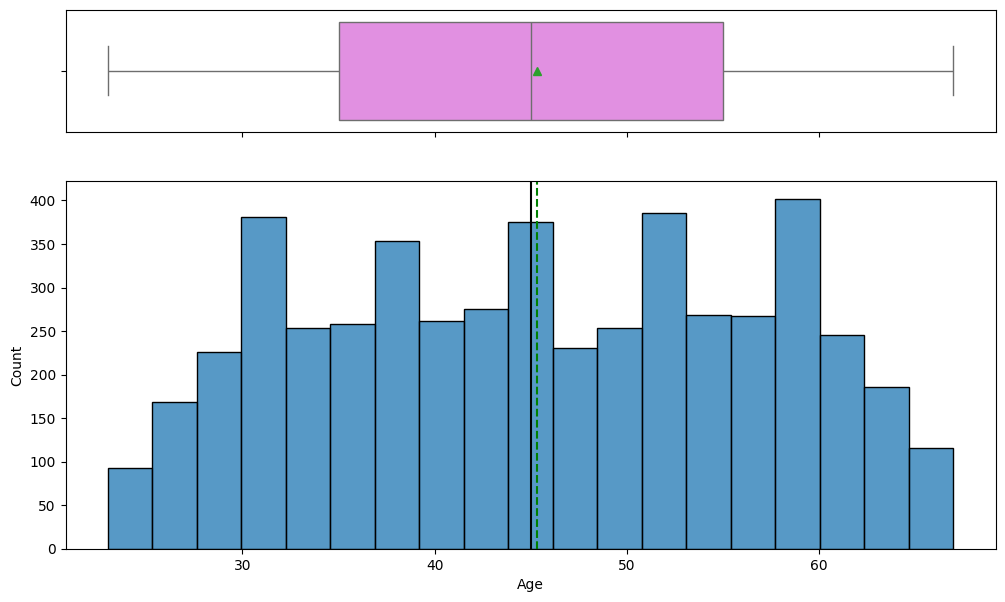

In [18]:
histogram_boxplot(data, "Age")


*   The ages are evenly distributed with the median around 45 years, with about 50% of the customers being between 35 and 55 years old approximately.
*   There are no outliers present for age.



#### Experience

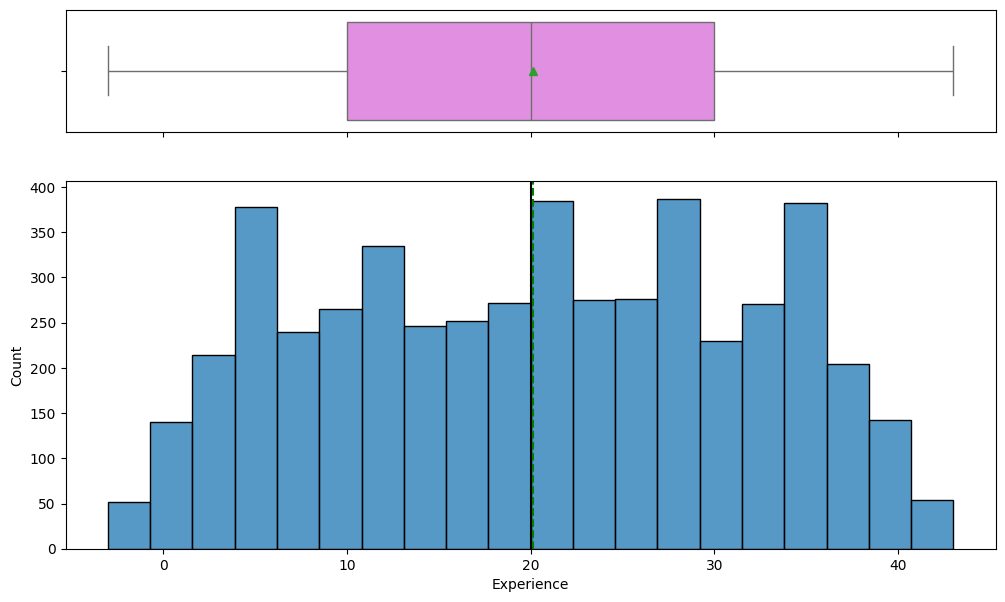

In [19]:
histogram_boxplot(data, "Experience")


*   The years of experience are evenly distributed without skews.
*   There are no outliers.
*   Unexpectedly, there are negative values for experience.
*   At a glance, Age and Experience seem to have very similar looking distributions.



#### Income

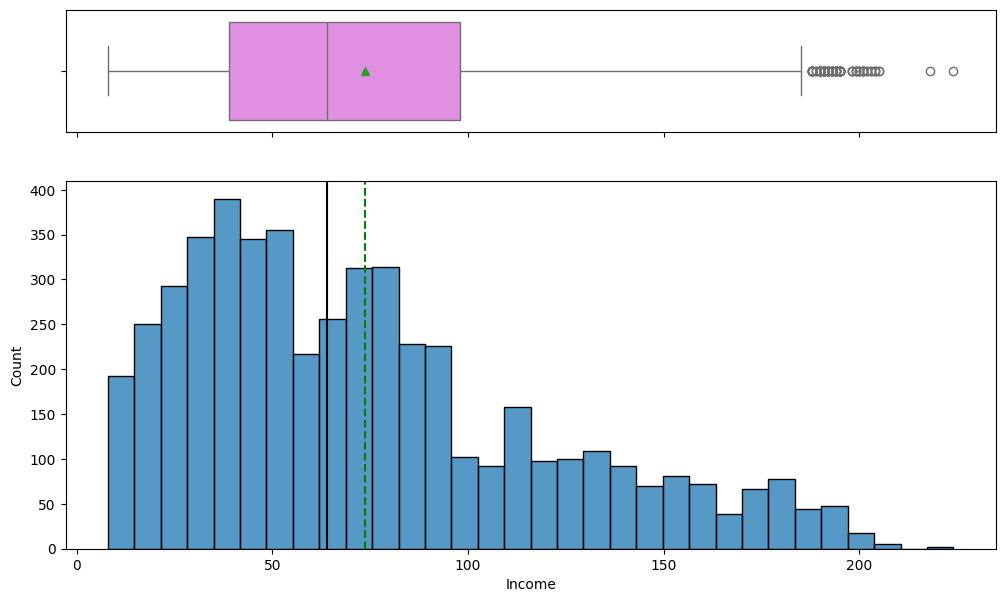

In [20]:
histogram_boxplot(data, "Income")



*   The income variable is right skewed, which aligns with what is expected. There tends to be a much higher number of people in the lower to middle income bracket and very few with high income.
*   The customers in the highest income range are outliers, wheras the average Income is around 75 thousand dollars. 75% of the customers have an average income of 100k USD or less.



#### CCAvg

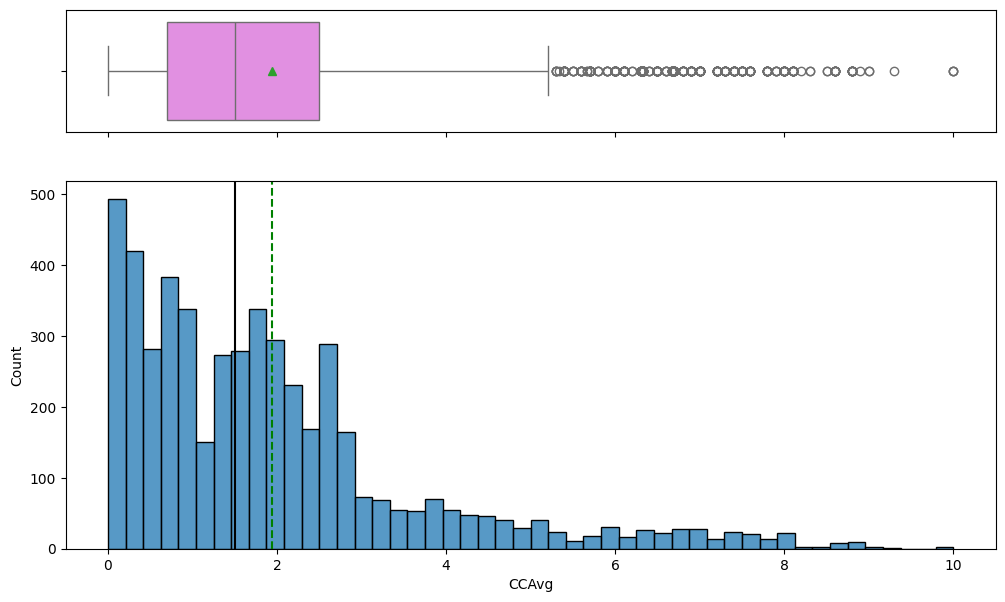

In [21]:
histogram_boxplot(data, "CCAvg")



*   The data is heavily right skewed, with any data points above 5 (thousand dollars) considered to be outliers of which there are quite a few.
*   50% of the customers, however, have an average credit card spending between approximately 1 and 3 thousand dollars.



In [22]:
data[data["CCAvg"] != 0].shape[0]


4894

**How many customers have credit cards?**

4894 customers have credit cards because their credit card spending is greater than 0.

#### Mortgage

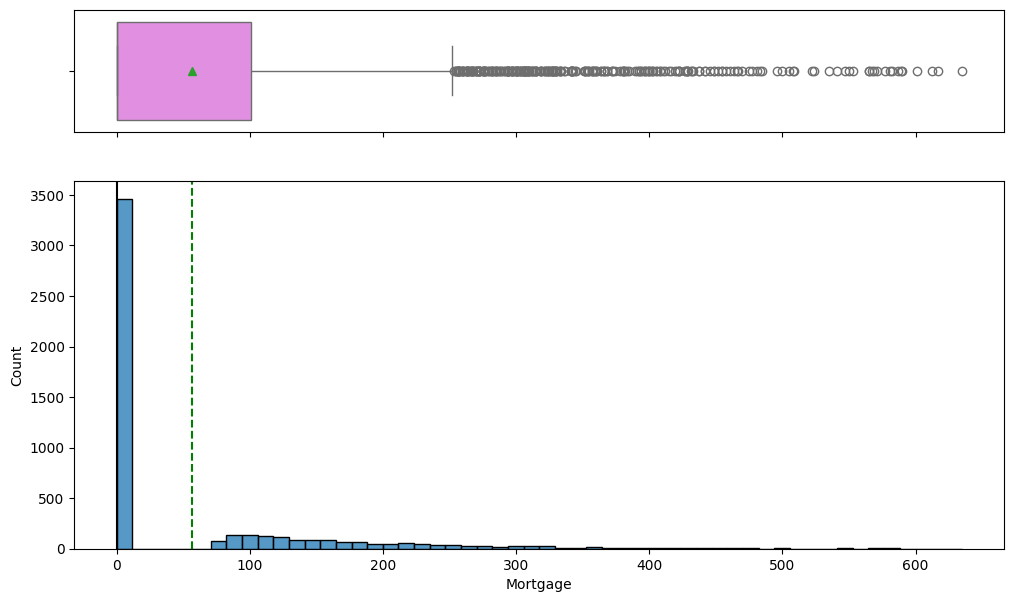

In [23]:
histogram_boxplot(data, "Mortgage")



*   The mortgage variable is extremely right skewed.
The median of the data is equal to the minimum value which is 0. The majority of the customers do not have a mortgage.
*   Due to this uneven distribution, a large part of the data is considered an outlier.

**What is the distribution of mortgage attribute? Are there any
noticeable patterns or outliers in the distribution?**

The distribution is very right skewed, with most of the data points with value 0 and many outliers. This means majority of the customers don't have a mortgage and the few that do have a wide distribution.




#### Family

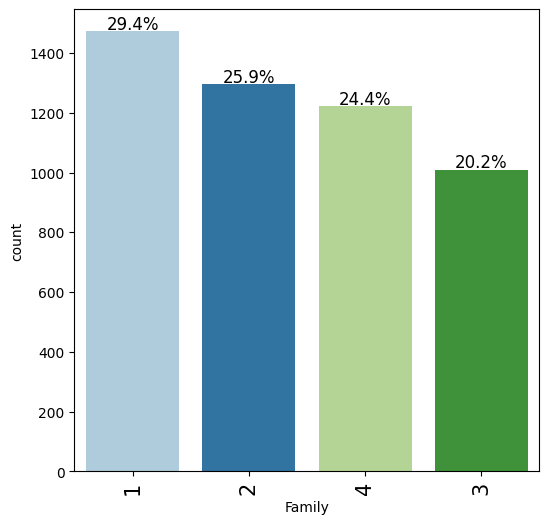

In [24]:
labeled_barplot(data, "Family", perc=True)



*   The family size of the customer are fairly similarly distributed between 1 and 4 members, which 1 being the most commonly occuring family size and 3 being the least common.
*   29.4% of the customers have a family size of 1, 25.9% have a family size of 2, 24.4% have a family size of 4 and 20.2% have a family size of 3.



#### Education

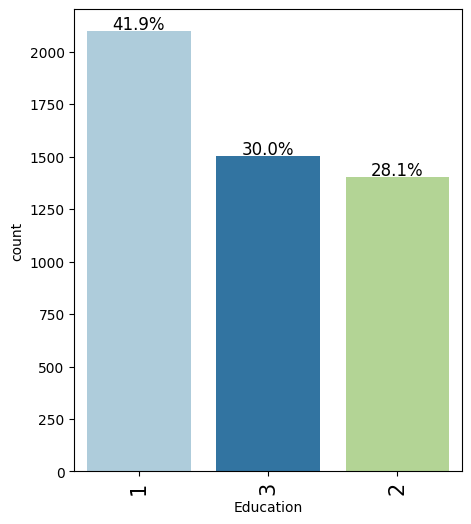

In [25]:
labeled_barplot(data, "Education", perc=True)



*   With the encoding of the variables in mind, majority of the customers have an undergrad education level, 41.9% of them to be exact.
*   30% of the costumers are at a graduate level and 28.1% are advanced/professional.



#### ZIPCode

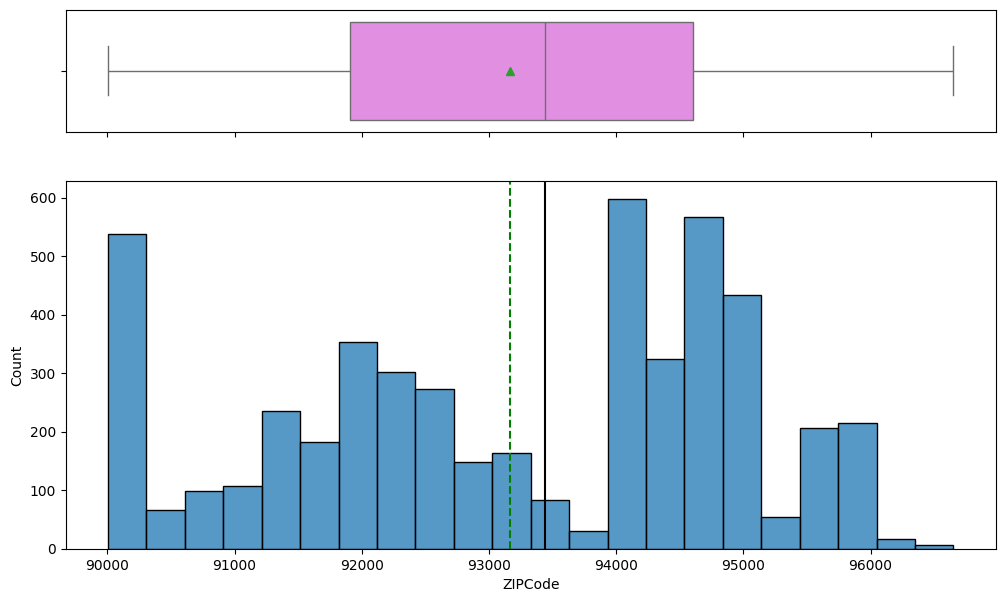

In [26]:
histogram_boxplot(data, "ZIPCode")



*   The ZIP Code is a number that doesn't hold arithmetic meaning (cannot be added, averaged, etc.) but the order of the numbers could potentially hold some significance.
*   There is a wide range of ZIP Codes in the data with some of the intervals having a very high number of customers.



In [27]:
#Unique values in ZIPCode
data["ZIPCode"].value_counts().head(10)

,count
ZIPCode,
94720,169
94305,127
95616,116
90095,71
93106,57
93943,54
92037,54
91320,53
91711,52




*   Analyzing this nominal variable, we can see that some ZIP codes repeat very frequently. There may or may not be some influence in the customer behaviour from certain ZIP Code regions.
*  The most commonly repeated ZIP Codes are as follows: 169 customers reside in the ZIP Code 94720, 127 reside in ZIP Code 94305, 116 in the ZIP Code 95616 and so on.



#### Personal Loan

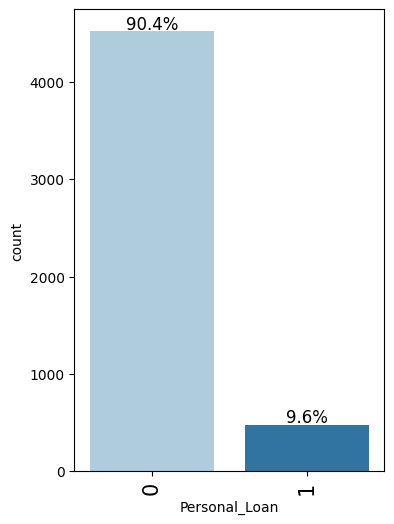

In [ ]:
#Target Variable
labeled_barplot(data, "Personal_Loan", perc=True)



*   Personal Loan is the target variable. It is worth noting the distribution of the target variable to see if there is enough data for all the values of the target variable so the machine learning model has enough data to learn from.
*   90.4% of the customers did not accept the personal loan while 9.6% did.



#### Securities Account

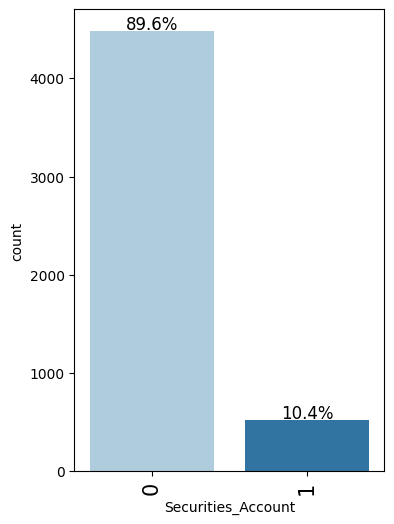

In [28]:
labeled_barplot(data, "Securities_Account", perc=True)



*   10.4% of the customers have a security account with the bank while 89.6% of them do not.



#### CD Account

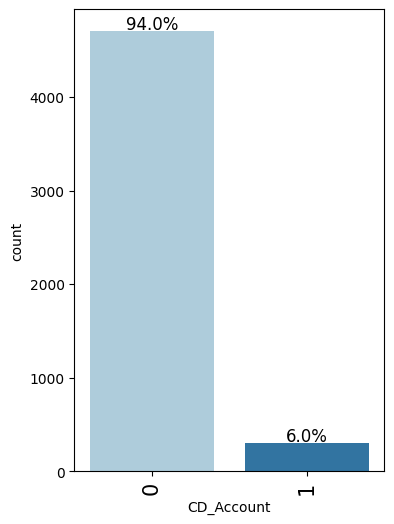

In [29]:
labeled_barplot(data, "CD_Account", perc=True)



*   Only 6% of the customers in the dataset have a CD Account with the bank.


#### Online

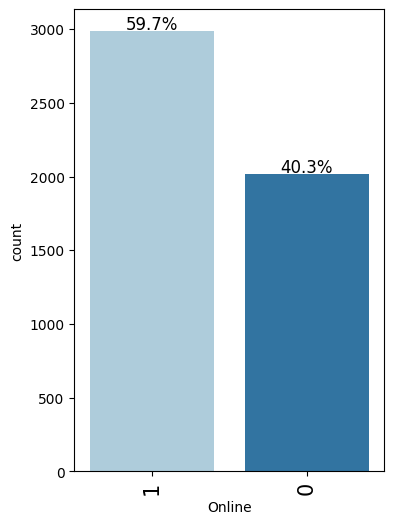

In [30]:
labeled_barplot(data, "Online", perc=True)



*   59.7% of the customers use the bank's internet banking facilities while 40.3% of them do not.



#### Credit Card

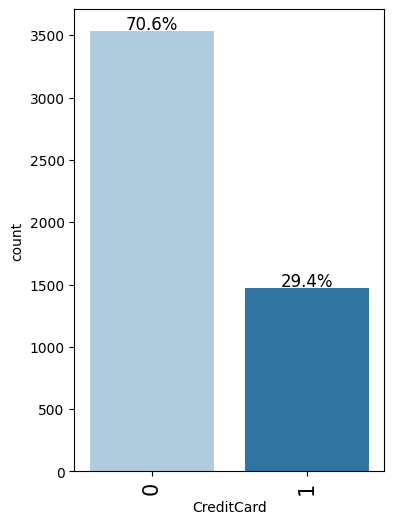

In [31]:
labeled_barplot(data, "CreditCard", perc=True)



*   Only 29.4% of the customers in the dataset have a credit card with any other bank excluding AllLife


### Bivariate Analysis

#### Correlation Observations

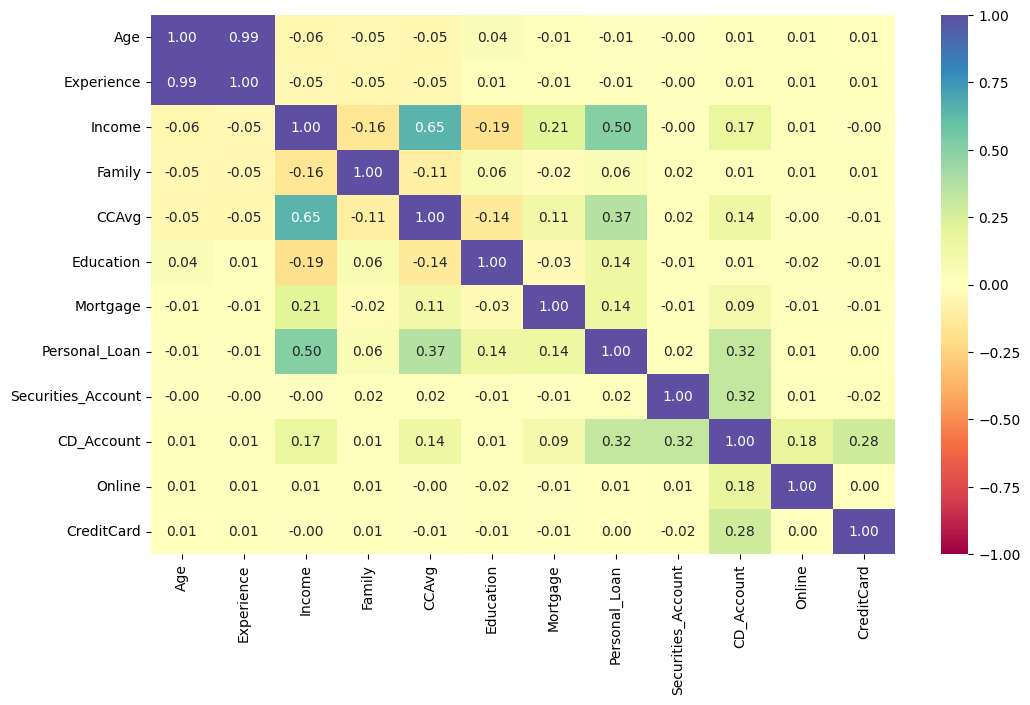

In [32]:
#Correlation heatmap to analyze relationship between all the variables except ZIP Code since it doesn't have numerical meaning
cols_list = data.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('ZIPCode')

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()



*   At immediate first glance there is an extremely high positive correlation between Age and Experience, indicating that it is probably enough to use just one of the variables in the model building. It is likely that the decision tree algorithm chooses one of the variables and henceforth doesnt use the other to split the data because it probably won't add much value. Having said all this, both variables are very weakly negatively correlated with the target variable and aren't likely to form part of an efficient decision tree at all.
*   Average credit card spending is fairly highly correlated to Income and so is Personal Loan. It logically makes sense because higher the income, the more likely they are to spend. Correlation between Average credit card spend and whether or not they opted for the personal loan is an interesting observation, though the correlation isn't extremely high.
* It is observed that Average credit card spend and whether or not the customer had a CD Account is also positively related to whether they accepted the Personal Loan.
* There is also a weak positive correlation between whether the customer had a CD account and if they had a Securities account, and also if they had a Credit Card at another bank.


**What are the attributes that have a strong correlation with the target attribute (personal loan)?**

The attributes with a notable correlation with the target attribute personal loan are:

Income

CCAvg

CD_Account

#### Relationship of various columns with Personal Loan (target variable)


##### Education and Personal Loan

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


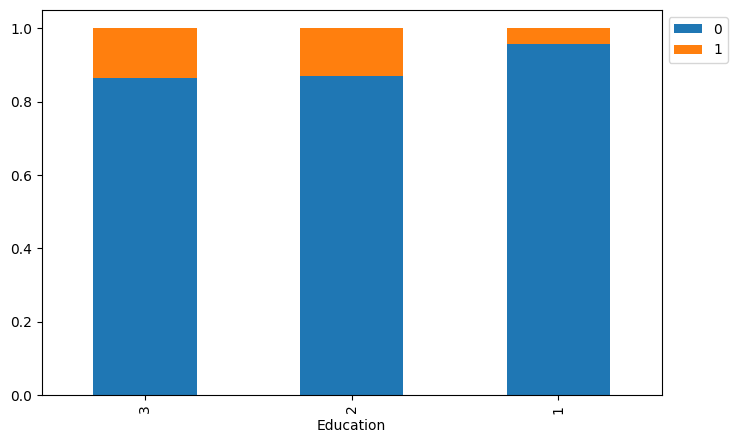

In [33]:
stacked_barplot(data, "Education", "Personal_Loan")

* Customers with an education level of 2 or 3 i.e. Graduate or Advanced/Professional are more likely to have accepted the Personal Loan than those in education level 1.

**How does a customer's interest in purchasing a loan vary with their education?**

Customers' interesting in purchasing a loan is higher for those in Education groups 2 and 3 ie Graduate or Advanced/Professional.

##### CD_Account and Personal Loan

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


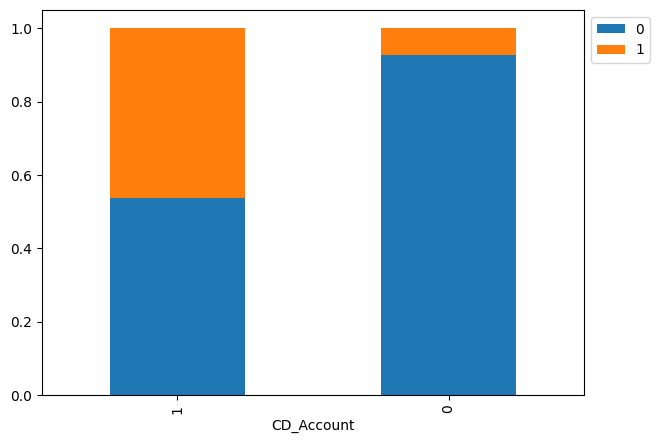

In [34]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

* Customers with a CD Account are much more likely to accept the Personal Loan.
* 46.3% of customers with a CD Account accepted the Personal Loan wheras only 7.2% customers without a CD Account accepted the Personal Loan.

##### Securities Account and Personal Loan

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


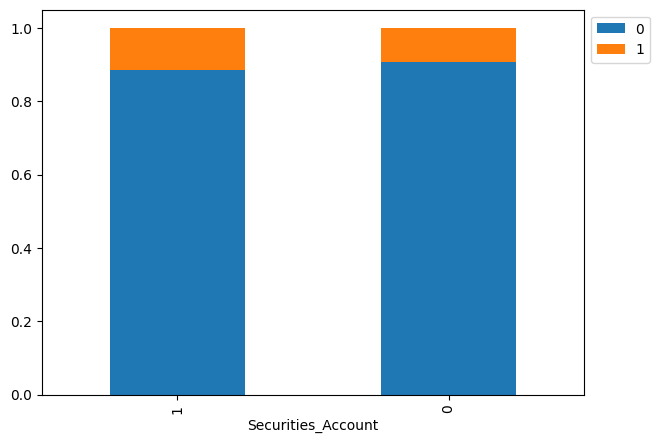

In [35]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

* There doesn't seem to be a very strong indication that whether or not a customer has a Securities Account influences their decision to accept the Personal Loan.

##### Mortgage and Personal Loan

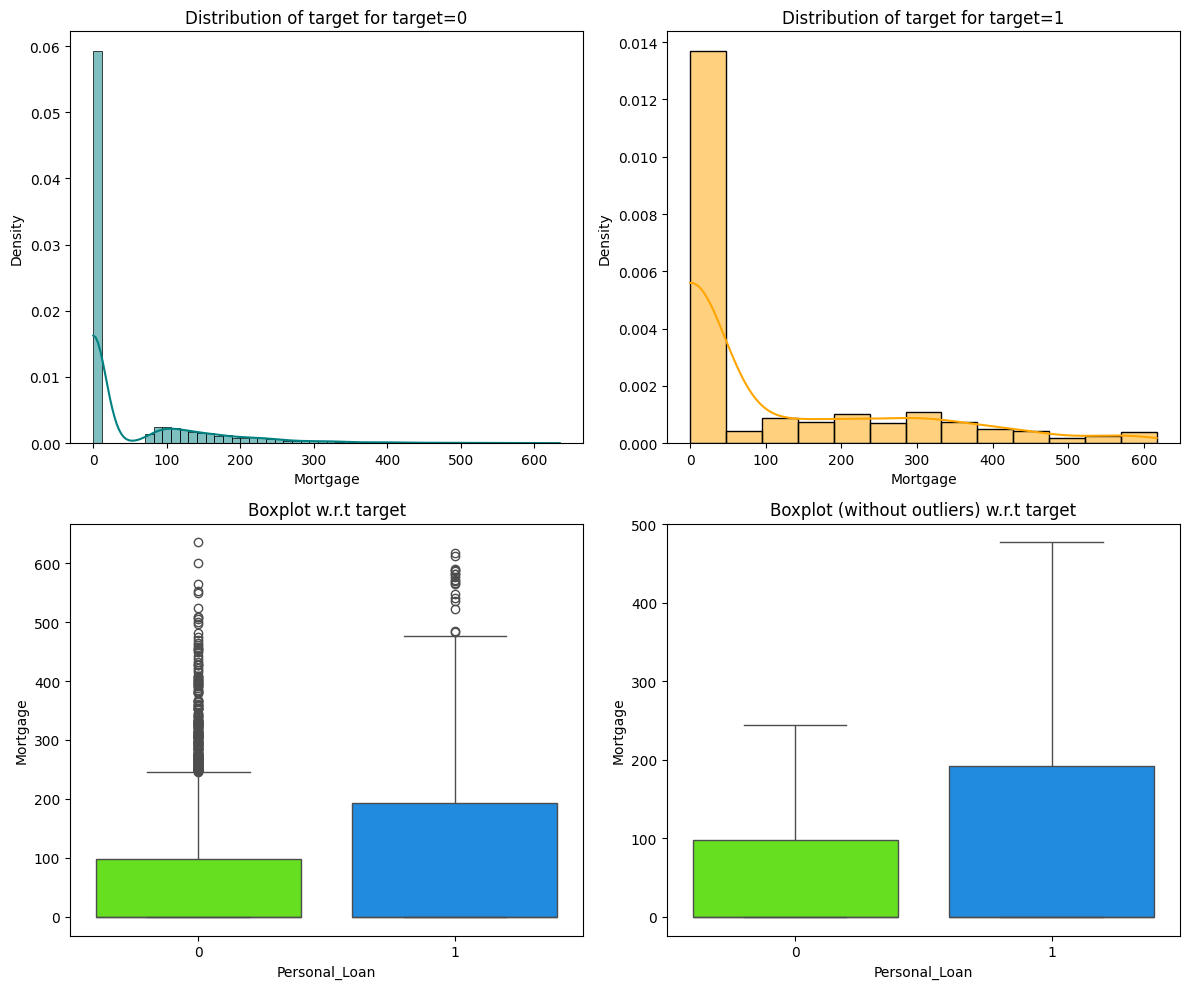

In [36]:
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan")

* There are a large number of customers with no mortgage that have both accepted and not accepted the Personal Loan.
* It is unlikely to be a very strong deciding factor, but looking at the distribution of mortgage, customers with no mortgage are more likely not to opt for the Personal Loan, but it must be noted that it is with many exceptions.

##### CCAvg and Personal Loan

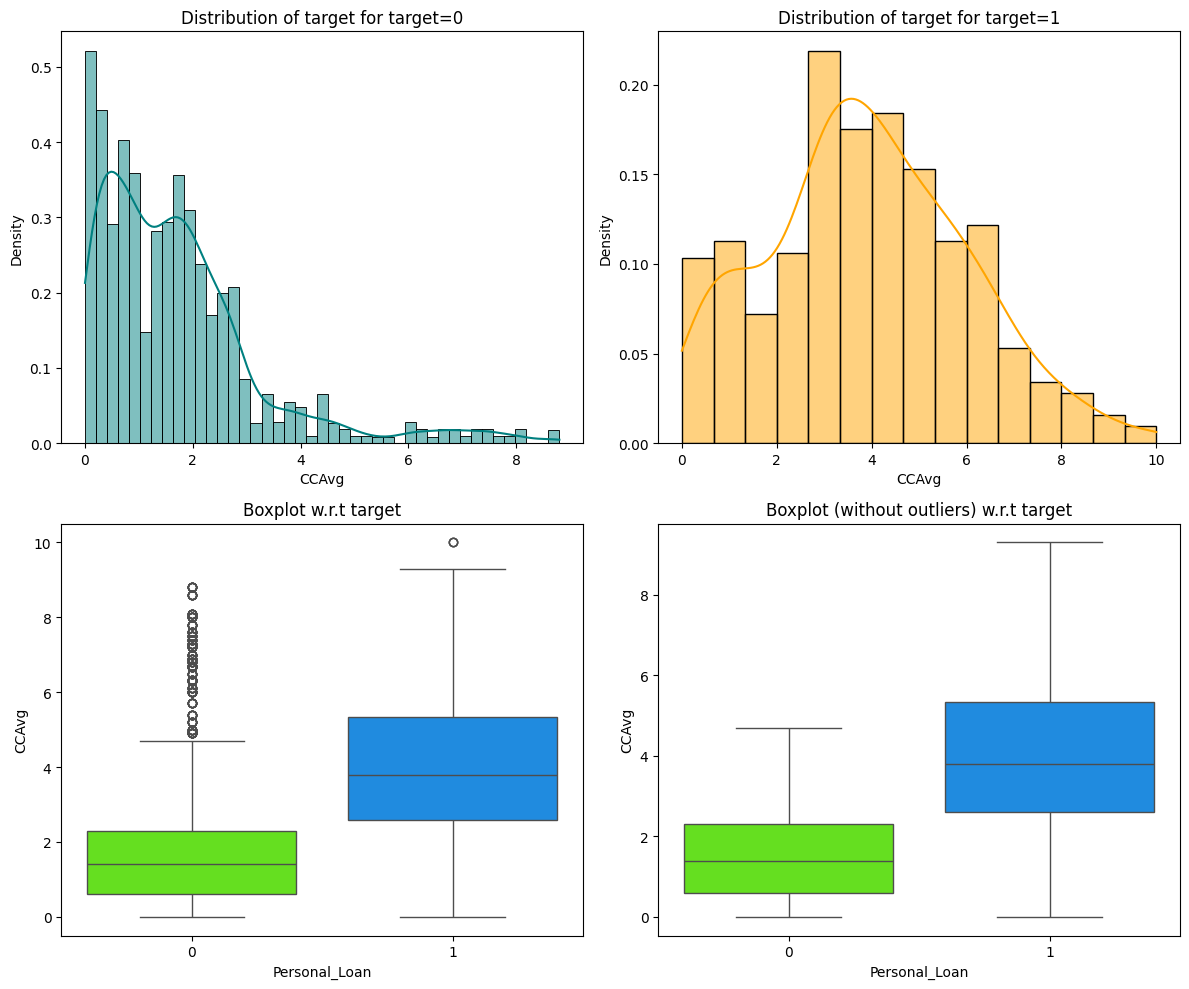

In [37]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

* Customers with a higher average credit card spending (above 2k USD) are more likely to opt for the Personal Loan. There is a clear divide and relationship between credit card spending and Personal Loan Decision.
* Customers with low average credit card spend don't tend to accept the Personal Loan; but this is not without its outliers and exceptions.

##### Family Size and Personal Loan

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


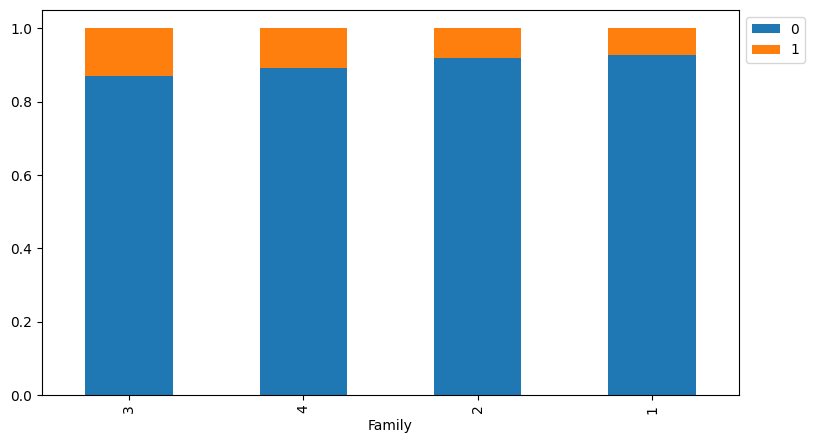

In [38]:
stacked_barplot(data, "Family", "Personal_Loan")

* There is a minimal increase in the customers with a family size of 3 or 4 and their likelihood to opt for the Personal Loan. It appears that families of larger sizes (more than 2) are more likely to opt for the loan.
* Out of all the people who accepted the Personal Loan (480), 55.6% of them come from families of size 3 or 4.

##### Income and Personal Loan

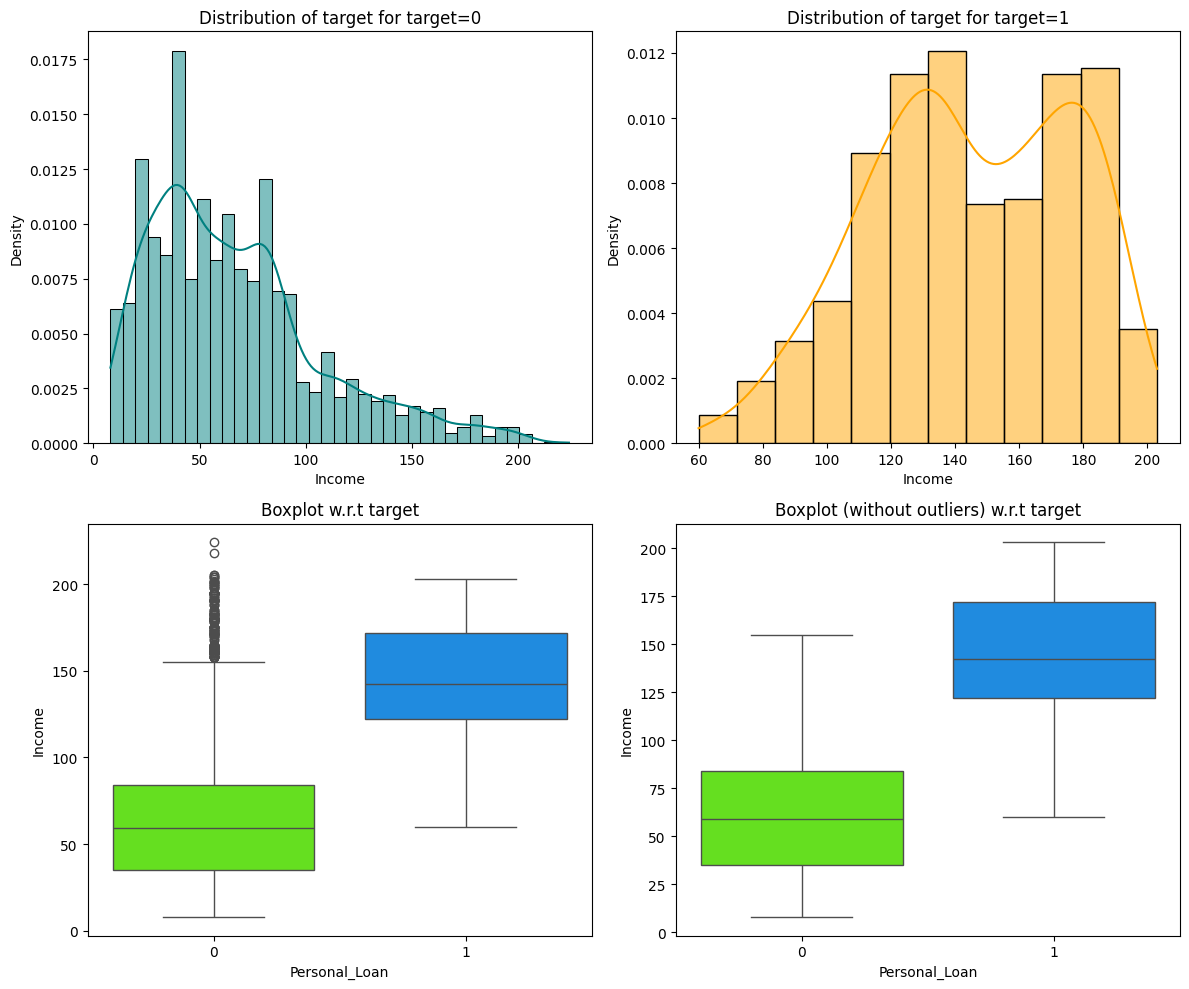

In [39]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

* There is a clear divide between customers without and without personal loans and their incomes. Customers with higher income (above 120k USD) are much more likely to have opted for the Personal Loan.
* In fact, no customer with an income below 60k USD has opted for the personal loan.
* All this points to a potentially strong indicator relationship between Income and our target variable.

##### Experience and Personal Loan

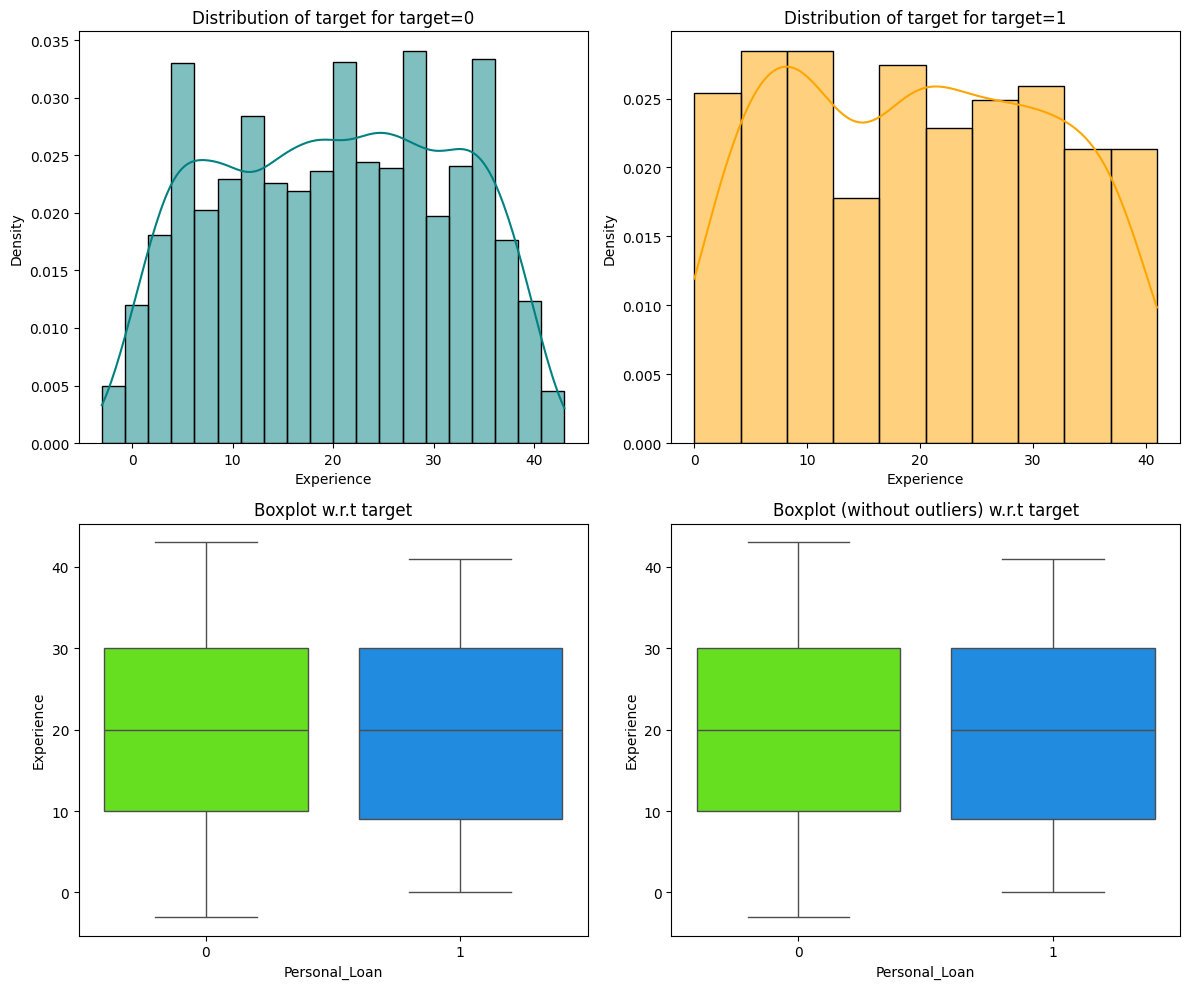

In [40]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

* The medians and distributions of years of experience are very identical for customers who accepted and did not accept the personal loan. There is no strong indication of a useful relationship here.

##### Age and Personal Loan

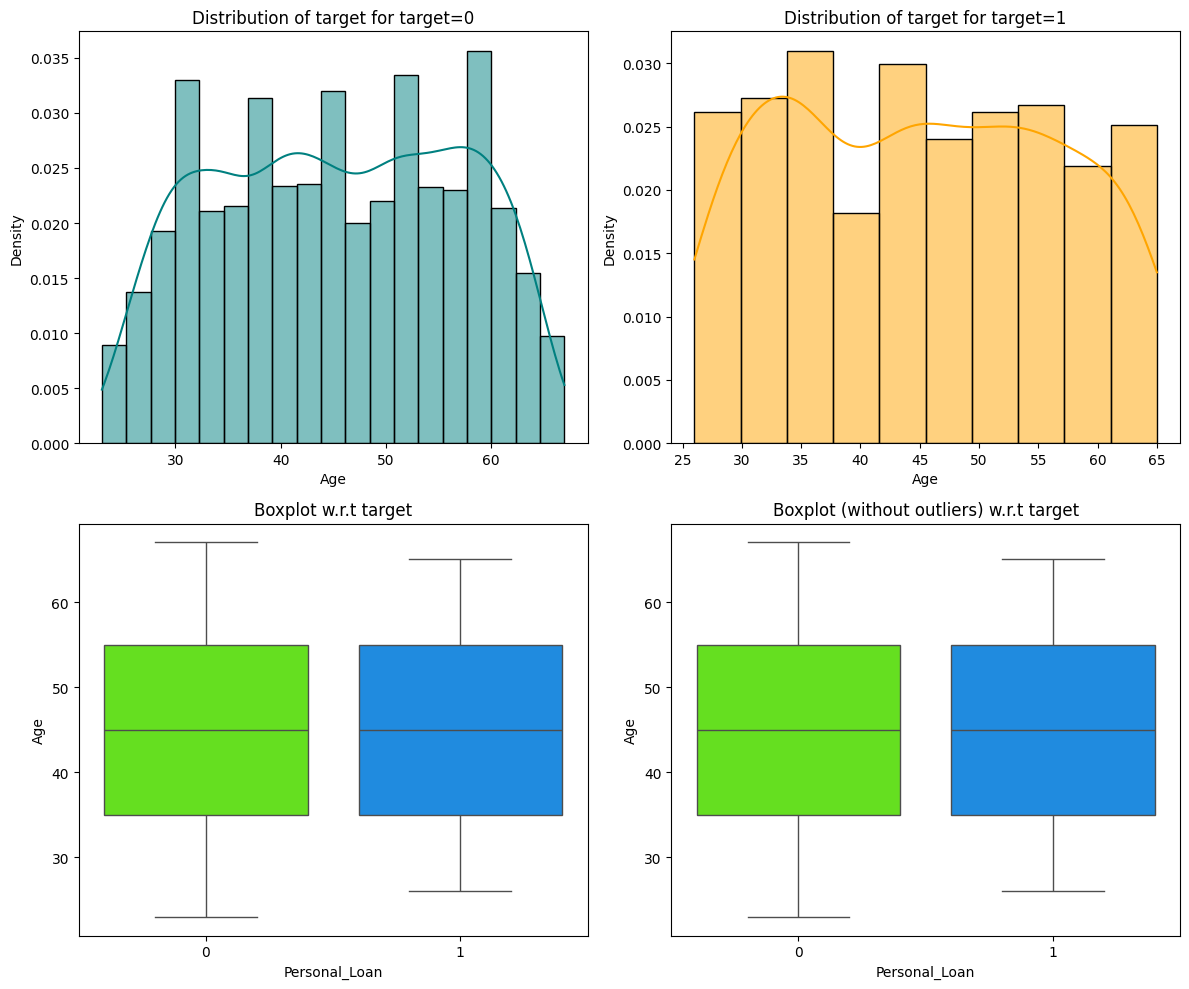

In [41]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

* The median and distributions of Age are very similar for both customers that accepted and did not accept the personal loan.
* Given the very similar distributions between Age and Experience and the high correlation we've seen before, it is not surprising that it also doesn't influence our target variable very much.



**How does a customer's interest in purchasing a loan vary with their age?**

Their interest in purchasing a loan doesn't vary much with their age, but those that do are between age range 25 and 65.

##### Online and Personal Loan

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


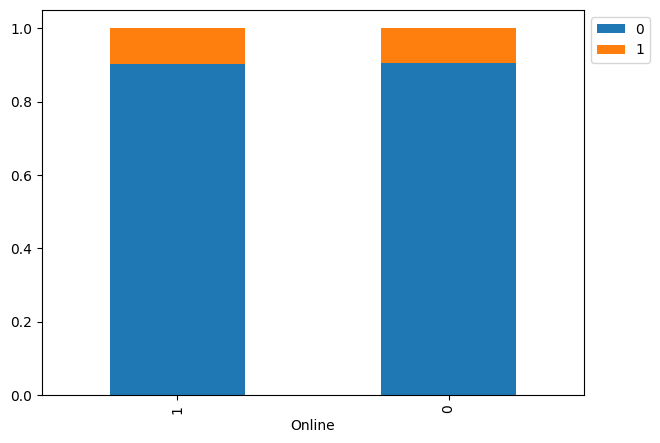

In [42]:
stacked_barplot(data, "Online", "Personal_Loan")

* There seem to be similar proportions of customers who did and did not accept the Personal Loan whether or not they used the Online Banking Facilities.
* Among customers that do use Online banking, 9.7% of them accepted the Personal Loan and for the customers that don't use Online banking, 9.3% accepted the Personal Loan.
* These ratios are very similar and don't indicate a high indicator relationship between Online and the target variable.

##### Credit Card and Personal Loan

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


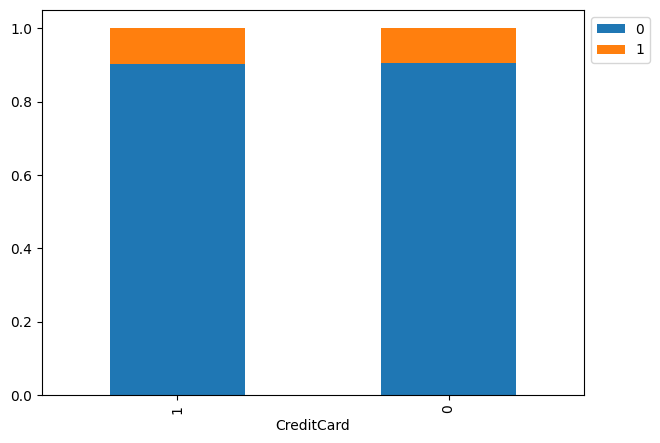

In [43]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

* There is a very similar proportion of customers who did and did not accept the Personal Loan between the groups of customers that do and do not have credit cards in other banks.
* Among customers that do have credit cards in other banks, 9.7% of them accepted the Personal Loan and among those customers that don't have credit cards in other banks, 9.5% of them accepted the loan.
* These ratios are very similar and don't indicate a high indicator relationship between CreditCard and the target variable.

### Specific Questions



Questions:

**What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?**

The distribution is very right skewed, with most of the data points with value 0 and many outliers. This means majority of the customers don't have a mortgage and the few that do have a wide distribution.


---


**How many customers have credit cards?**

4894 customers have credit cards because their credit card spending is greater than 0.


---



**What are the attributes that have a strong correlation with the target attribute (personal loan)?**

The attributes with a notable correlation with the target attribute personal loan are:

Income

CCAvg

CD_Account

---



**How does a customer's interest in purchasing a loan vary with their age?**

Their interest in purchasing a loan doesn't vary much with their age, but those that do are between age range 25 and 65.

---



**How does a customer's interest in purchasing a loan vary with their education?**

Customers' interesting in purchasing a loan is higher for those in Education groups 2 and 3 ie Graduate or Advanced/Professional.

---



## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [44]:
# Experience has negative values which are most likely errors, which will be converted to positive
data['Experience'] = abs(data['Experience'])
data['Experience'].describe()

,Experience
count,5000.000000
mean,20.134600
std,11.415189
min,0.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,43.000000


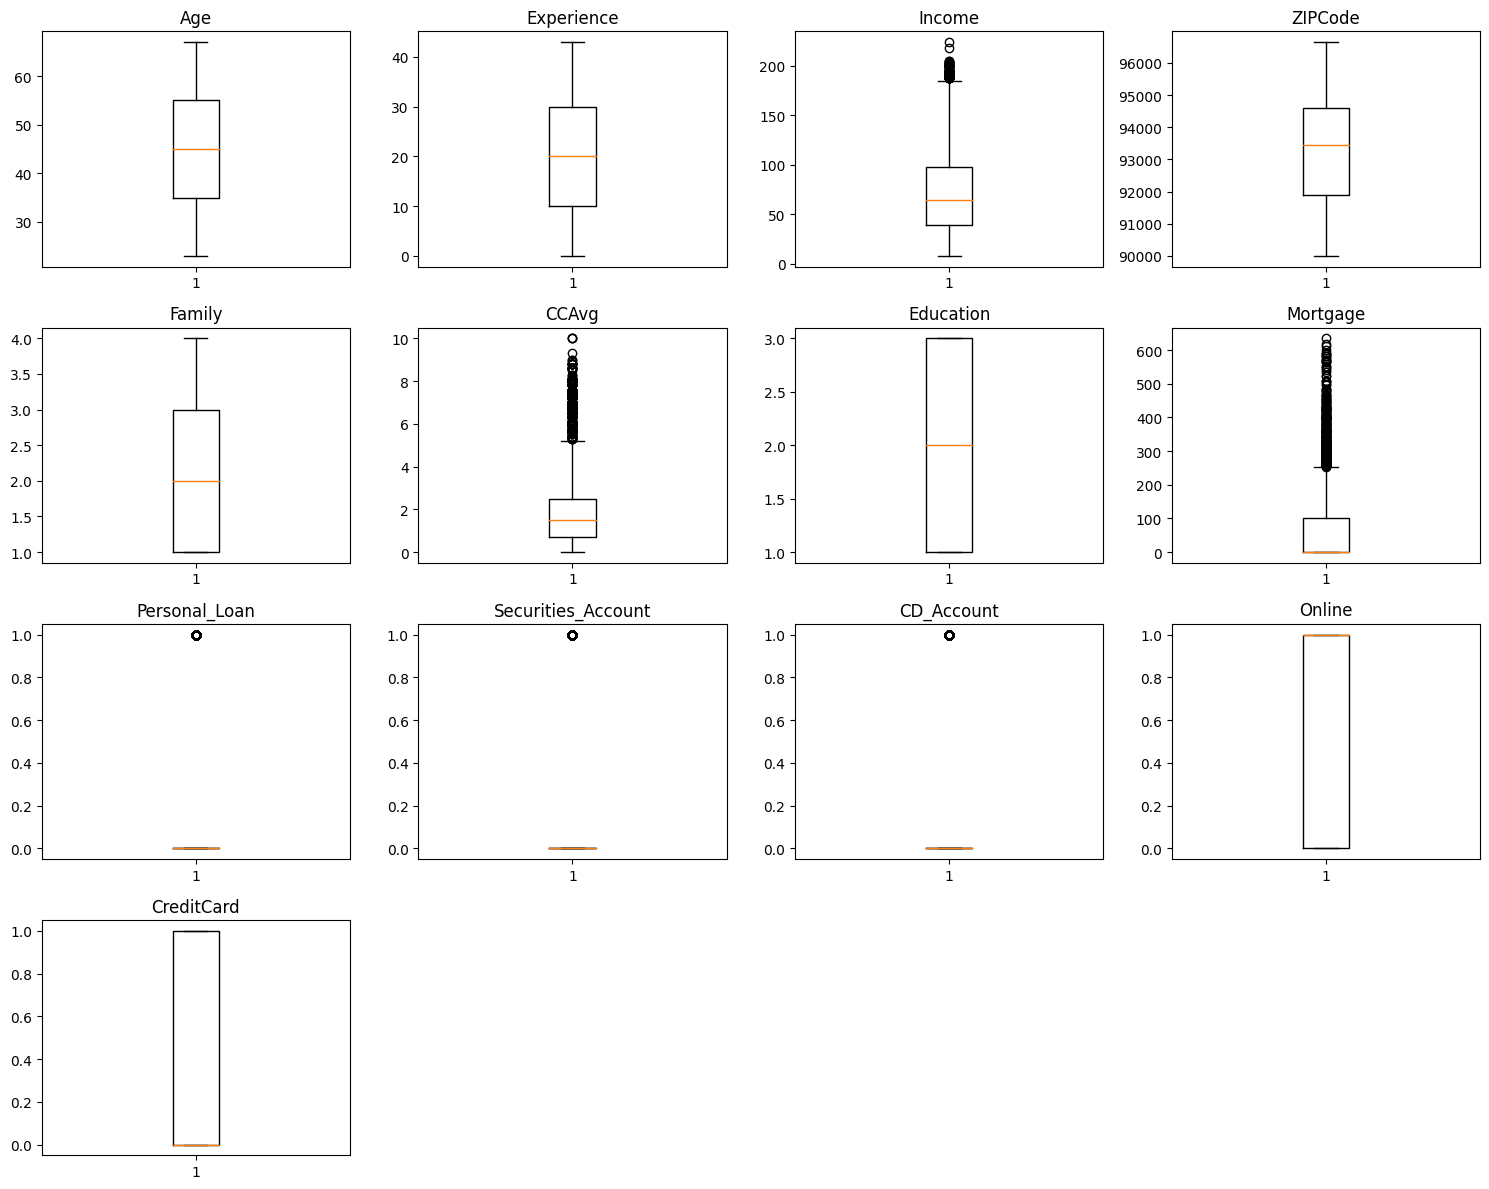

In [45]:
# Checking for outliers using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are no misssing values
* Experience column had negative values which are now corrected to positive
* Education column needs to be one hot encoded since it is a categorical value
* There are some outliers in Income, Mortgage and CCAvg columns but all seem to be valid values because most customers are in the lower-average income bracket and there are outliers in the higher range. Hence we need not treat the outliers.
* ZIPCode is a nominal variable with too many values to encode, so we will remove it from the analysis for now.


In [46]:
#Preparing target and predictor variables
X = data.drop(["Personal_Loan", "ZIPCode"], axis=1)
Y = data["Personal_Loan"]

#Encoding Education into dummy variables
X = pd.get_dummies(X, columns=["Education"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [47]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 12)
Shape of test set :  (1500, 12)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


* We had seen that around 90.4% of observations belongs to class 0 (No Personal Loan) and 9.6% observations belongs to class 1 (Accepted Personal Loan), and this is approximately preserved in the train and test sets

## Model Building

### Model Evaluation Criterion

The model prediction can fail in two ways:
1. False Negative in the case that the customer did in fact accept the loan but the model predicts that it didn't.
2. False Positive in the case that the customer did not accept the loan but the model thinks that it did.

In the case of a false negative, the bank loses valuable customers that in fact will opt for the loan. When there are false positives, the bank may be overly optimistic about a customer's likelihood to accept the loan, hence spending more on marketing to them.
It is clear that it is more important to reduce the false negatives, which are lost opportunities and helps raise the acceptance rate of the loan, also reducing revenue loss and valuable customers, hence the score of Recall should be maximized in our analysis of models.

The below functions define the calculation of accuracy, Recall, Precision and F1 metrics as well as the confusion matrix to evaluate our models.
The codes have been reused from the MLS2 Decision Tree code notebook.

In [48]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [49]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

#### Decision Tree default parameters

In [50]:
model0 = DecisionTreeClassifier(criterion="gini", random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

##### Analyzing model performance on train data

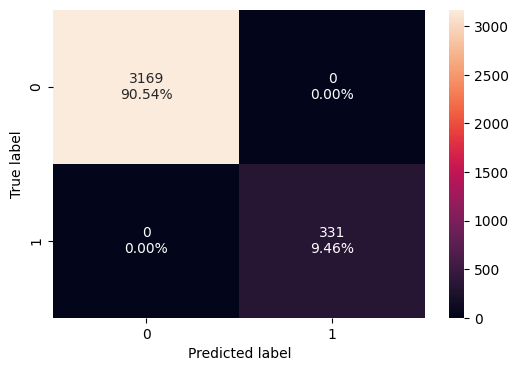

In [51]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [52]:
decision_tree_default_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* The model has no false negatives or false positives and has perfect performance scores for the train data. This is likely to be a case of overfitting.

##### Analyzing model performance on test data

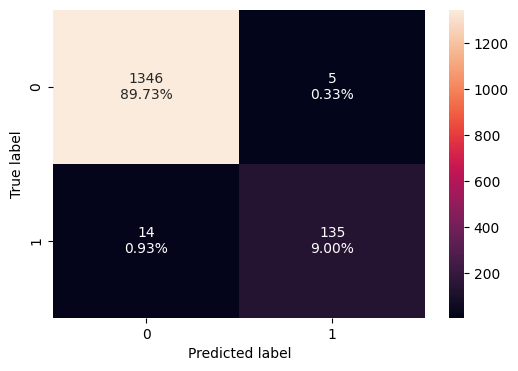

In [53]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [54]:
decision_tree_default_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_test

,Accuracy,Recall,Precision,F1
0,0.987333,0.90604,0.964286,0.934256


* The model performance on test data isn't as good or as perfect as in the training data but isn't so bad either. It is worth doing pre and post pruning to make sure the model performs similarly in both test and train data.

##### Visualizing the decision tree

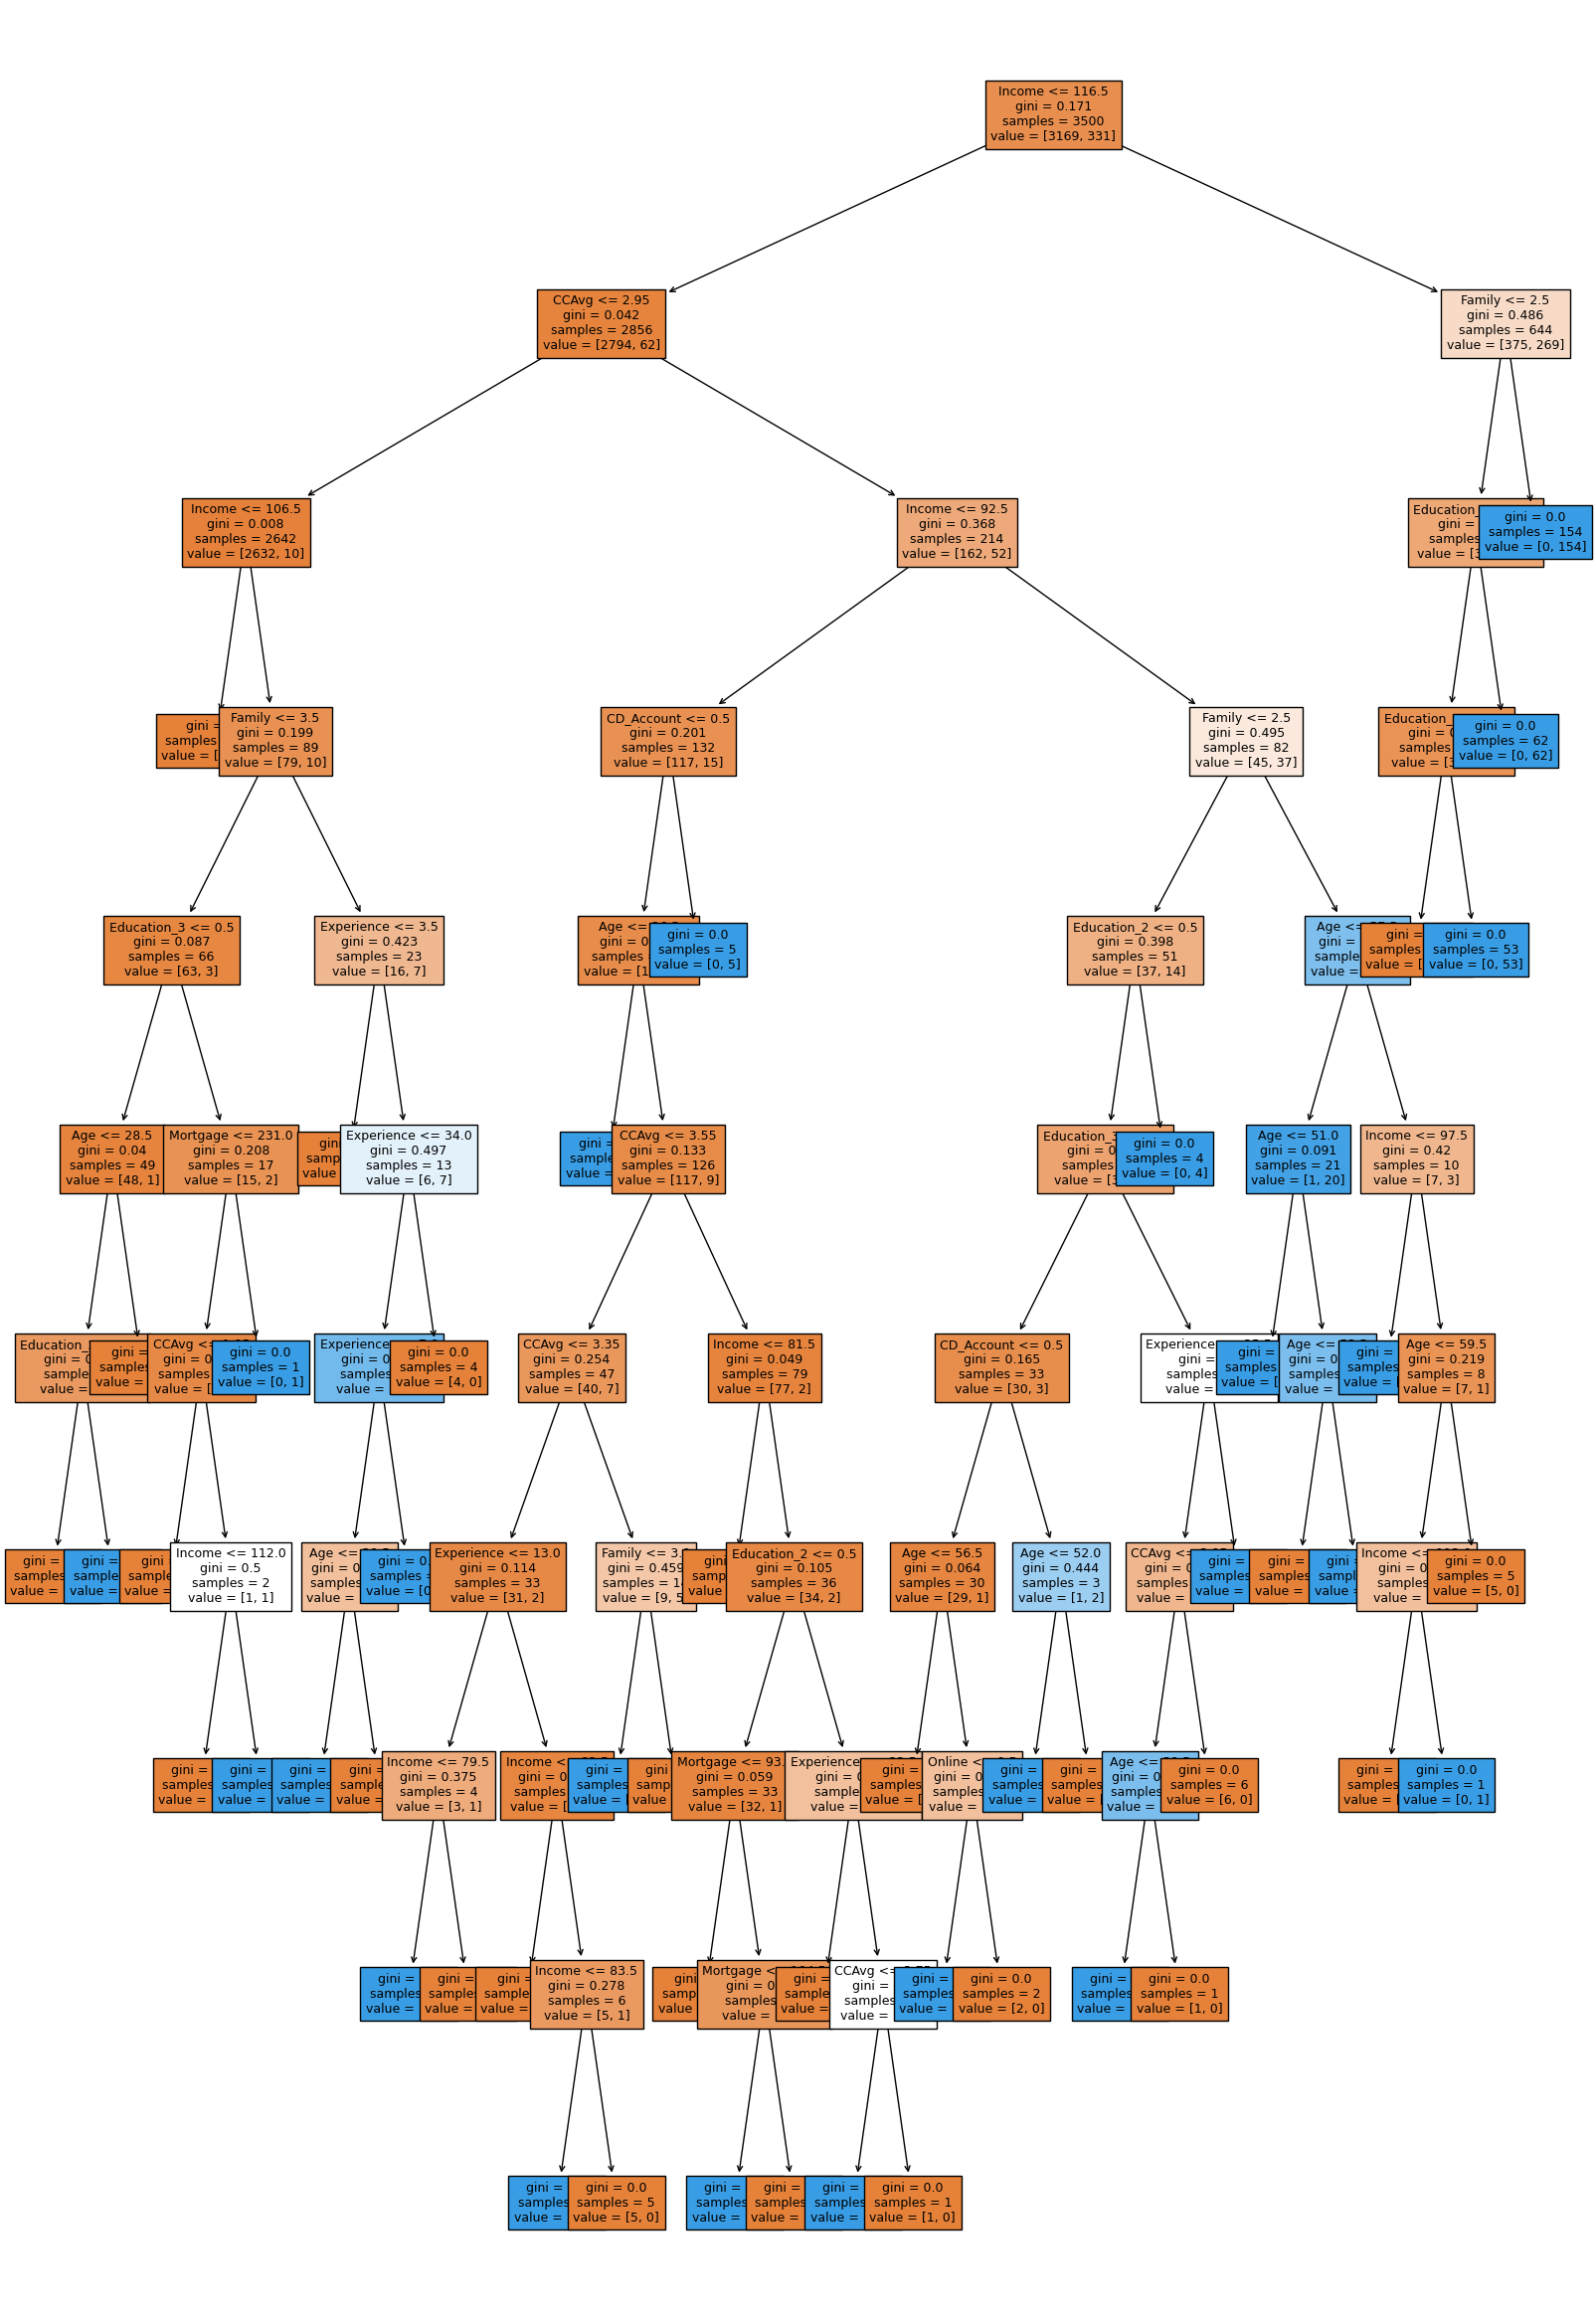

In [55]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model0,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [56]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model0, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- weights: [43.00, 0.00] class: 0
|   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |--- Mortgage <= 231.00
|   |   |   |   |   |   |--- CCAvg <= 1.95
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  1.95
|   |   |   |   |   |   |   |--- Income <= 112.00
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  112.00
|   

##### Feature Importance

In [57]:
print(
    pd.DataFrame(
        model0.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.311722
Family              0.257587
Education_2         0.166192
Education_3         0.144605
CCAvg               0.049816
Age                 0.024788
Experience          0.019796
CD_Account          0.017273
Mortgage            0.005996
Online              0.002224
Securities_Account  0.000000
CreditCard          0.000000


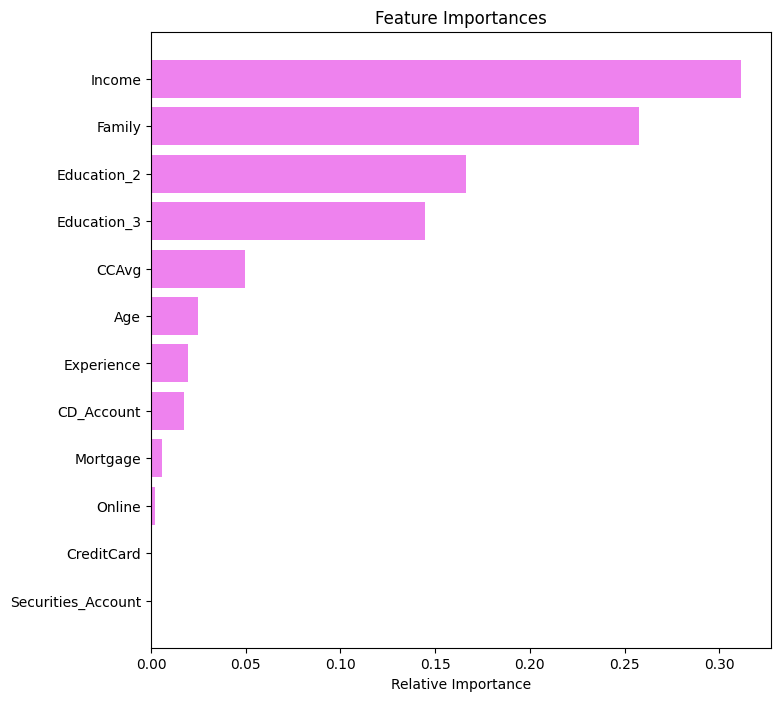

In [58]:
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important features in this model are Income, Family Size, Education levels 2 and 3, Average Credit Card Spend, Age, Experience, CD Account and Mortgage and Online.
* The decision tree is too big and also could benefit from class weights since frequency of class 0 is 90% and the frequency of class 1 is 10%, then class 0 will become the dominant class and the decision tree will become biased toward the dominant classes.
* It is also noted that both Age and Experience are being used in the decision tree, which is not ideal so we will remove the Experience column.

#### Decision Tree with class_weights

In [59]:
# Remove Experience column, add class weights for first model improvement
X = data.drop(["Personal_Loan", "ZIPCode", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["Education"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [60]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 11)
Shape of test set :  (1500, 11)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


In [61]:
model1 = DecisionTreeClassifier(criterion="gini", class_weight="balanced", random_state=1)
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

##### Analyzing model performance on train data

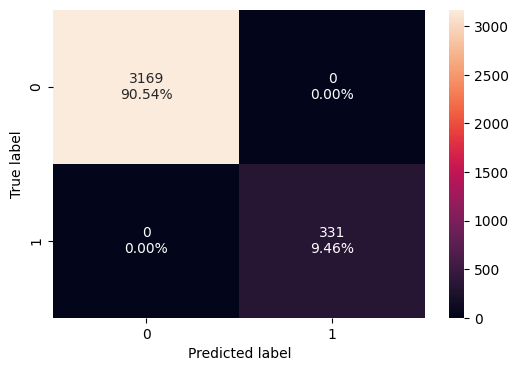

In [62]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [63]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


##### Analyzing model performance on test data

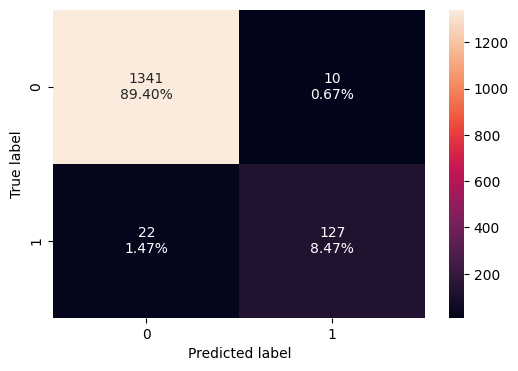

In [64]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [65]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.978667,0.852349,0.927007,0.888112


##### Visualizing the decision tree

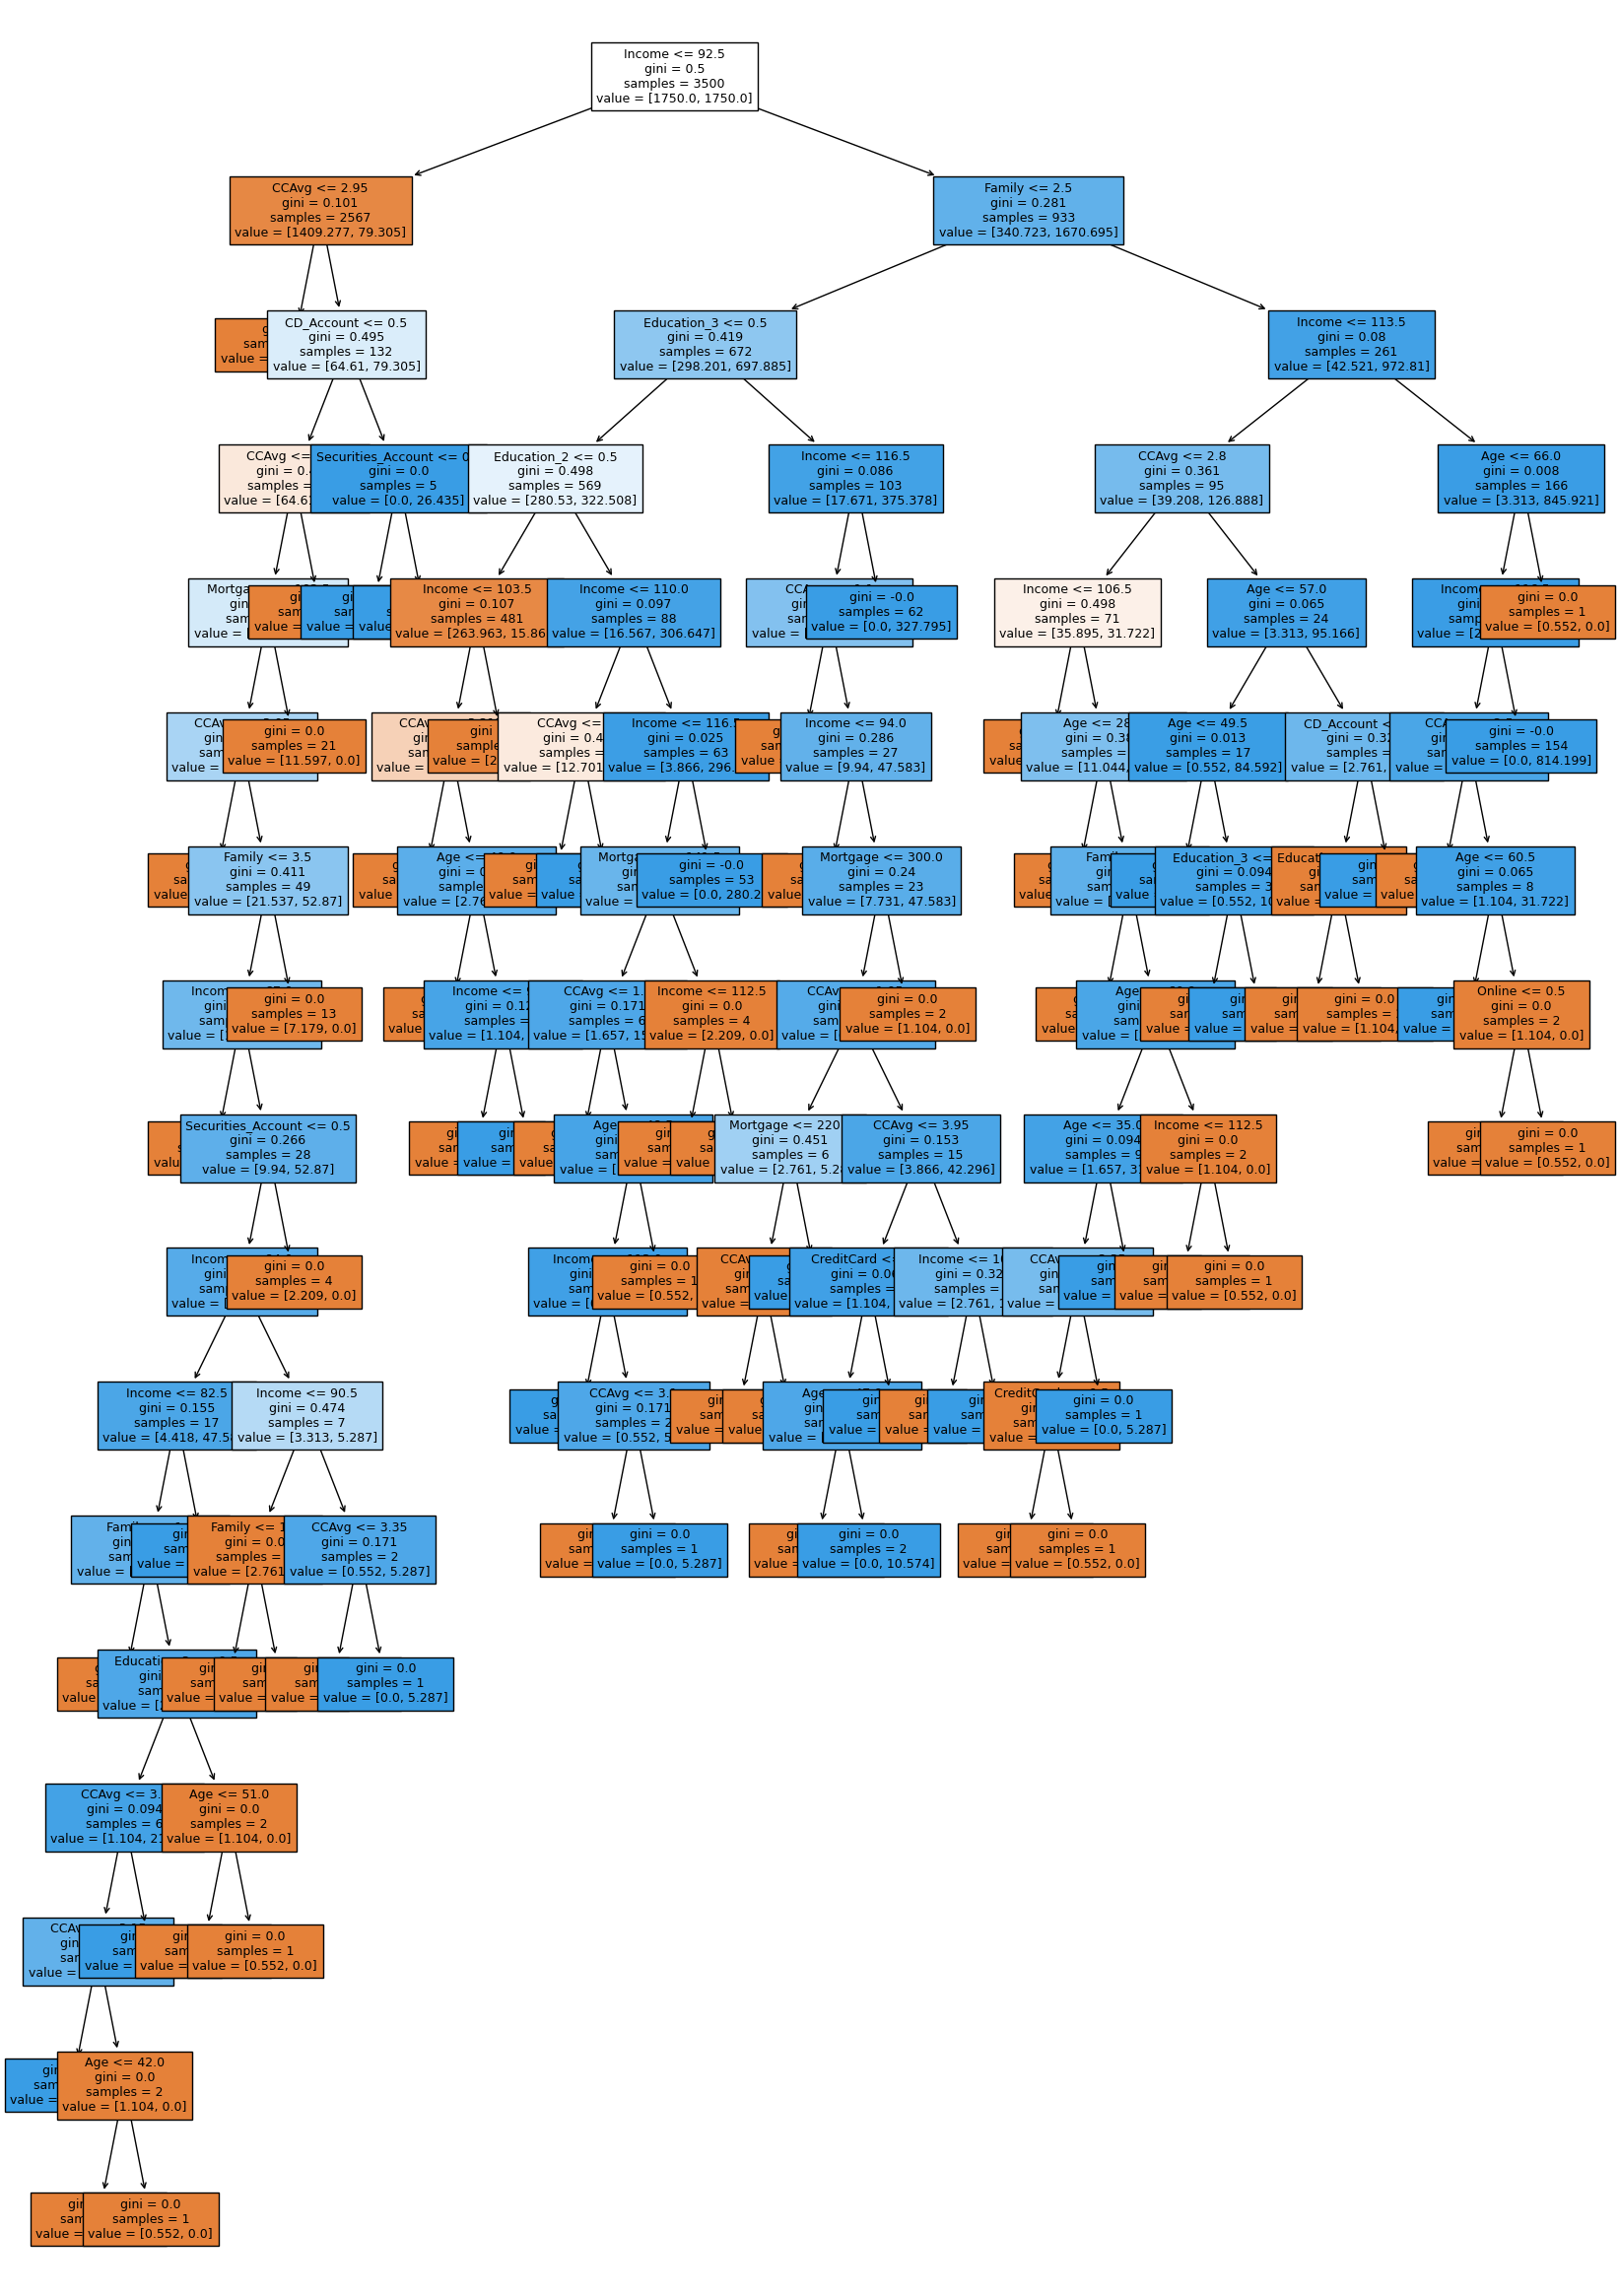

In [66]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [67]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model1, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |--- weights: [8.28, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- Income <= 67.00
|   |   |   |   |   |   |   |   |--- weights: [4.42, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  67.00
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- Income >  82.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 26.44] class: 1
|   |   |   |   |   |   |   |   | 

##### Feature Importance

In [68]:
print(
    pd.DataFrame(
        model1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Income              6.396730e-01
Education_2         1.363992e-01
CCAvg               9.458766e-02
Education_3         4.971142e-02
Family              4.749927e-02
Age                 1.062166e-02
CD_Account          9.961568e-03
Mortgage            9.615475e-03
Securities_Account  1.853859e-03
CreditCard          7.690297e-05
Online              7.707449e-19


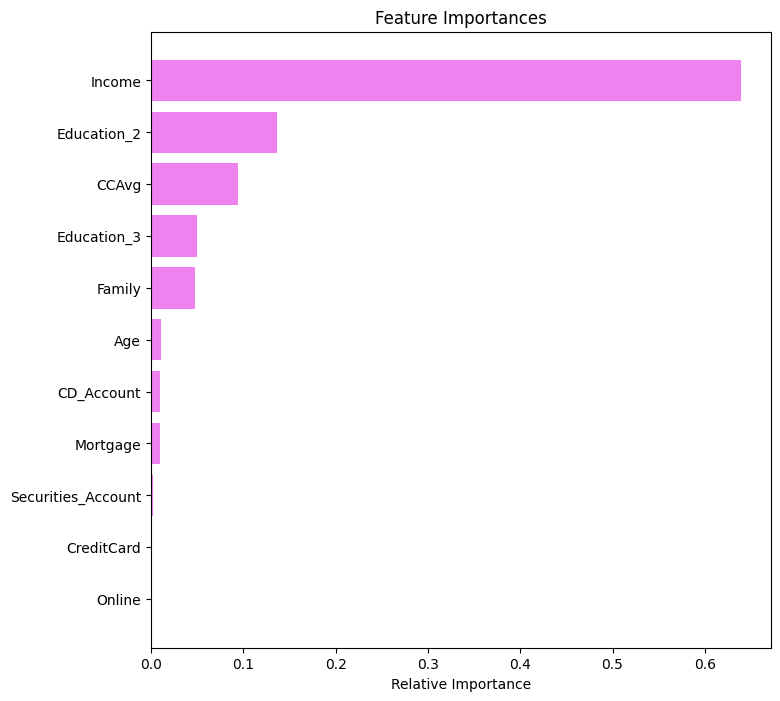

In [69]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important features in this model are Income, Education levels 2 and 3, Average Credit Card Spend, Family size, Age, CD Account and Mortgage.
* The model did not significantly improve. The model is still overfitting. The next step is to tune the hyperparameters for pre-pruning.

### Model Performance Improvement

#### Decision Tree with Pre-Pruning

In [70]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(6, 15)
max_leaf_nodes_values = [4, 5, 6, 7, 8, 9, 10]
min_samples_leaf_values = [4, 5, 6, 7, 8, 9, 10]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_leaf in min_samples_leaf_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_leaf=min_samples_leaf,
                class_weight='balanced',
                random_state=1
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)


            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples leaf: {best_estimator.min_samples_leaf}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 6
Max leaf nodes: 4
Min samples leaf: 4
Best test recall score: 1.0


In [71]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=4,
                       min_samples_leaf=4, random_state=1)

##### Analyzing model performance on train data

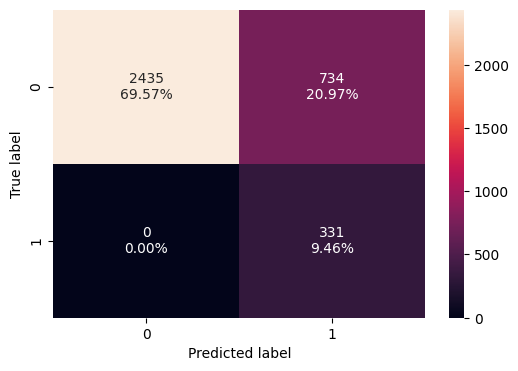

In [72]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [73]:
decision_tree_preprune_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_preprune_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


##### Analyzing model performance on test data

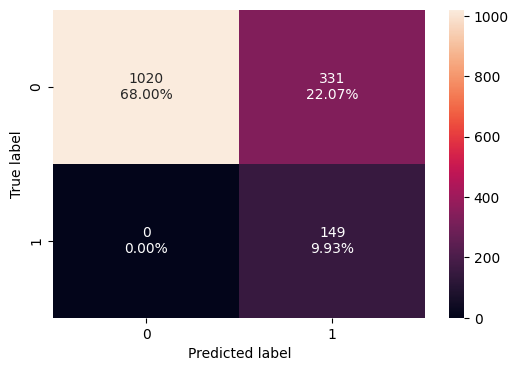

In [74]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [75]:
decision_tree_preprune_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_preprune_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


The model is now similar for both train and test values and gives a very high Recall value which is what we are looking for.
However, precision and F1 are very low, which means that will bring down the overall acceptance rate. We want a reasonable Precision and F1 while maximizing the Recall.

##### Visualizing the decision tree

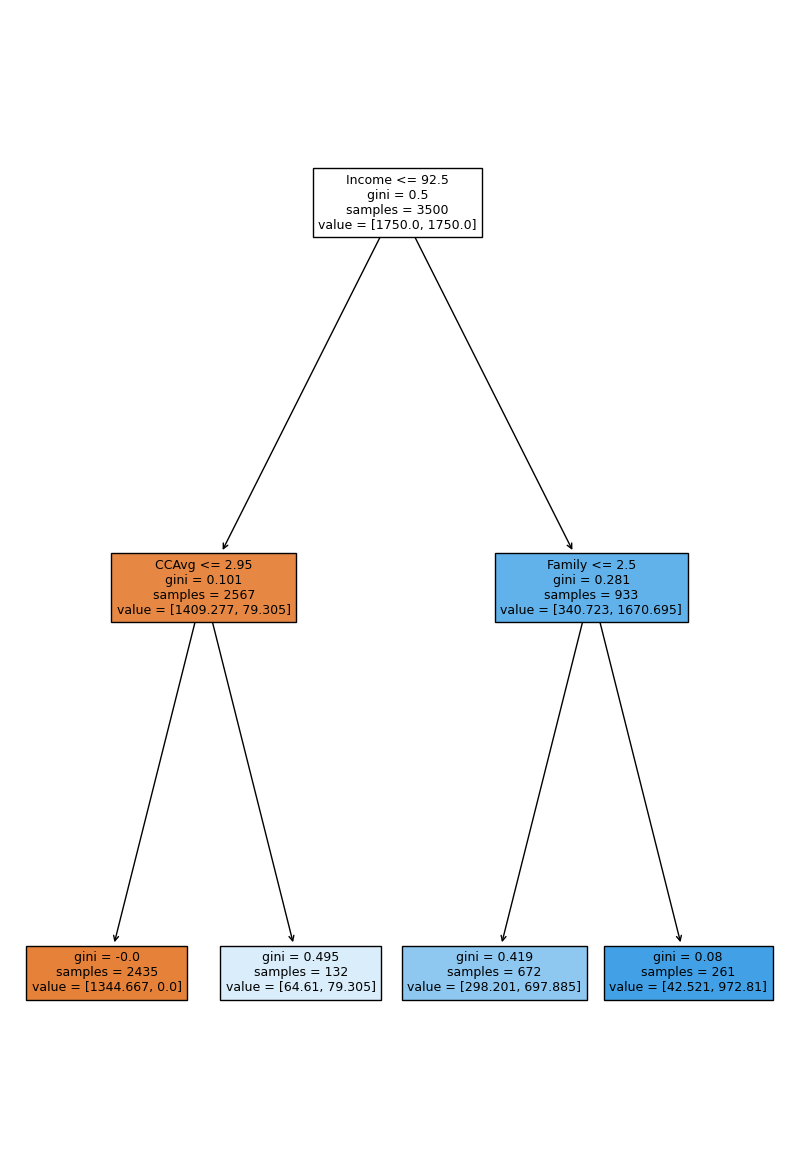

In [79]:
feature_names = list(X_train.columns)
plt.figure(figsize=(10, 15))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [77]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



##### Feature Importance

In [81]:
print(
    pd.DataFrame(
        model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.876529
CCAvg               0.066940
Family              0.056531
Age                 0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
Education_2         0.000000
Education_3         0.000000


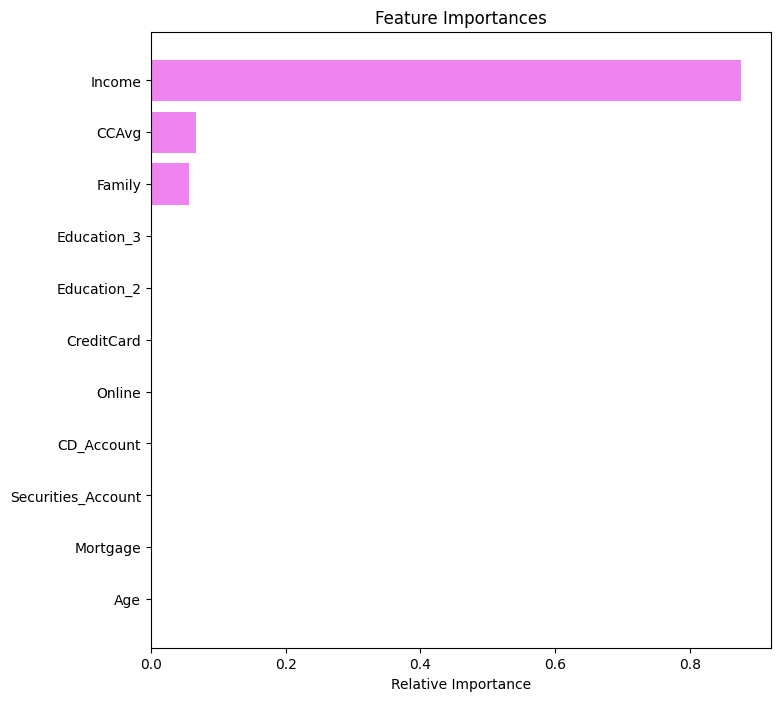

In [80]:
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important features in this model are Income, Average Credit Card Spend and Family.
* The model gives perfect Recall but very low Precision an F1 which is not ideal and perfect Recall which means it is still overfitting.
* The decision tree is possibly overly simplified, causing a high number of false positives. There are more false positives than true positives which is concerning.
* Next we can try post-pruning with the Cost Complexity Pruning logic.

#### Decision Tree with Post-Pruning

In [82]:
# Using Cost Complexity Pruning, calculating effective alphas and the
# corresponding total leaf impurities at each step of the pruning process
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-7.995347e-15
1,3.853725e-19,-7.994961e-15
2,3.853725e-19,-7.994576e-15
3,4.729571e-19,-7.994103e-15
4,5.255079e-19,-7.993578e-15
5,5.255079e-19,-7.993052e-15
6,5.255079e-19,-7.992527e-15
7,7.006772e-19,-7.991826e-15
8,1.051016e-18,-7.990775e-15
9,1.576524e-18,-7.989198e-15


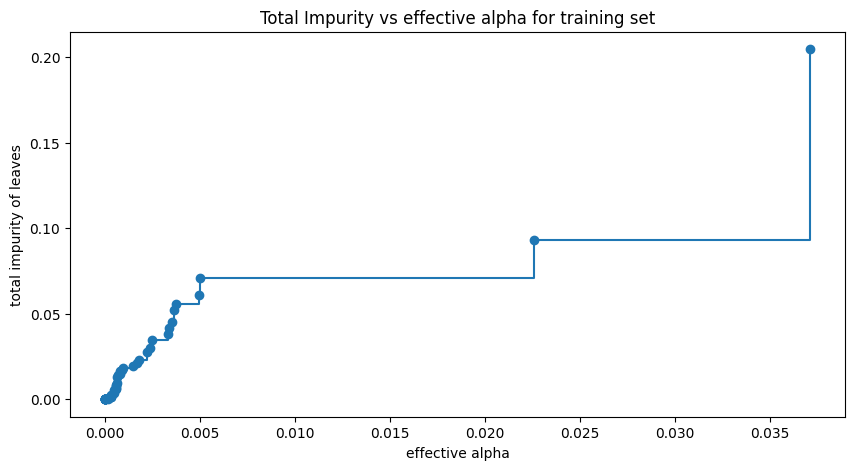

In [83]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [84]:
# Train a decision tree using each effective alphas. The last value in ccp_alphas is an alpha value that prunes the
# whole tree and thus has only one node and highest impurty.
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29537927599923164


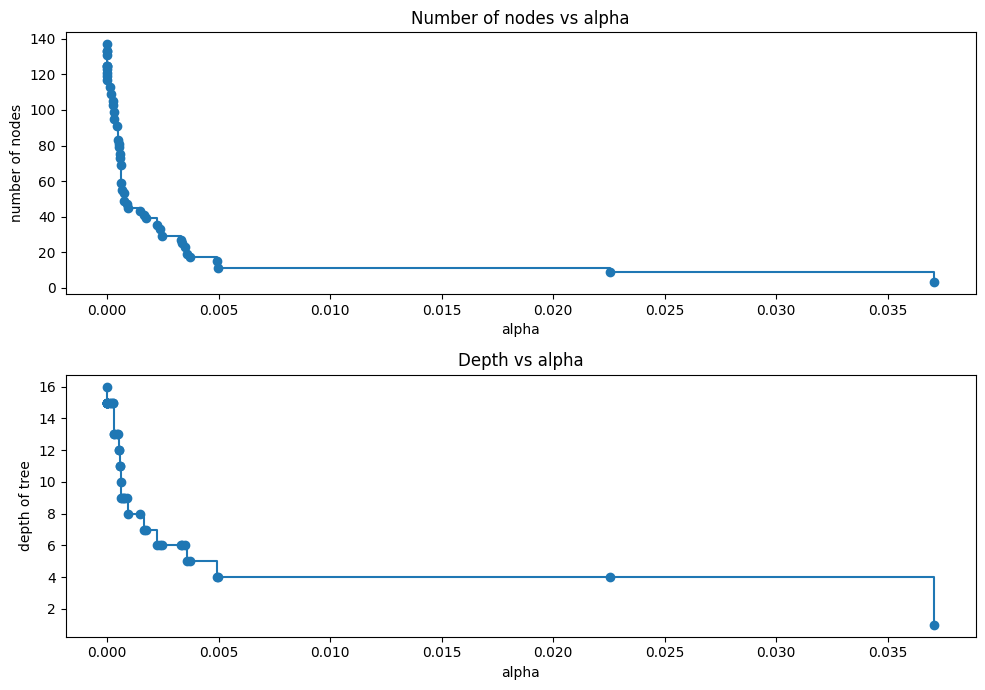

In [85]:
# We remove the alpha that corresponds to the tree with only one node
# and show here that the number of nodes decreases as alpha increases and so does the depth
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [86]:
# Calculating recall for the training set for all the alpha values
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [87]:
# Calculating recall for the test set for all the alpha values
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [88]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

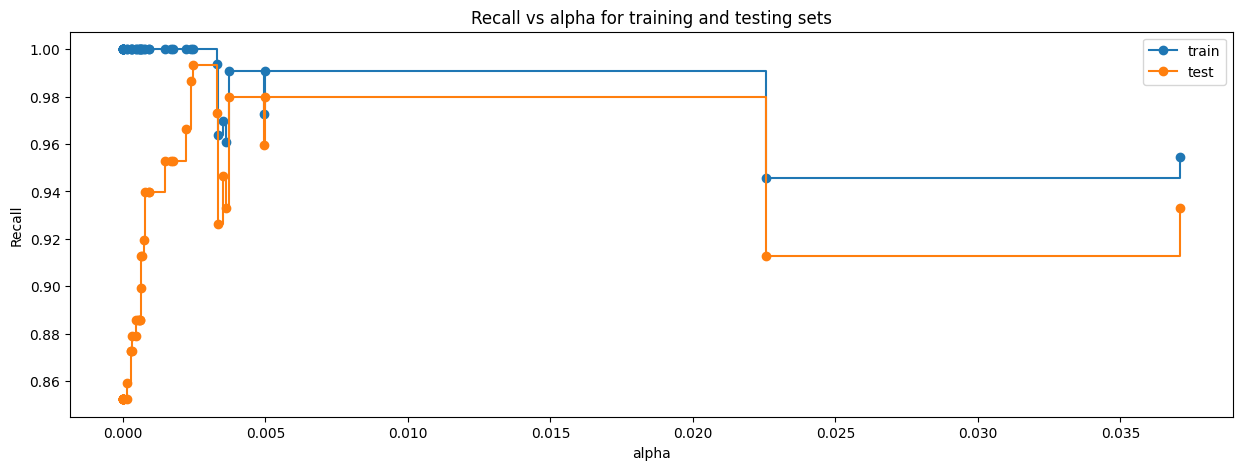

In [89]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [90]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0024726598786421854, class_weight='balanced',
                       random_state=1)


##### Analyzing model performance on train data

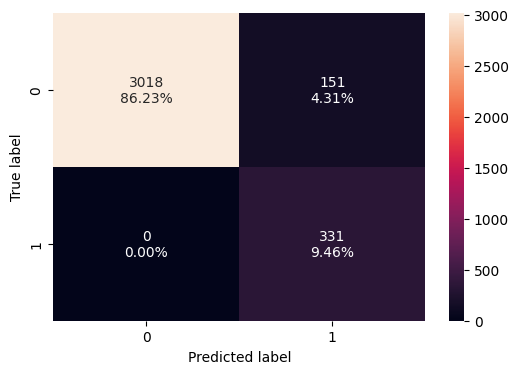

In [91]:
model3 = best_model
confusion_matrix_sklearn(model3, X_train, y_train)

In [92]:
decision_tree_postprune_train = model_performance_classification_sklearn(
    model3, X_train, y_train
)
decision_tree_postprune_train

,Accuracy,Recall,Precision,F1
0,0.956857,1.0,0.686722,0.814268


##### Analyzing model performance on test data

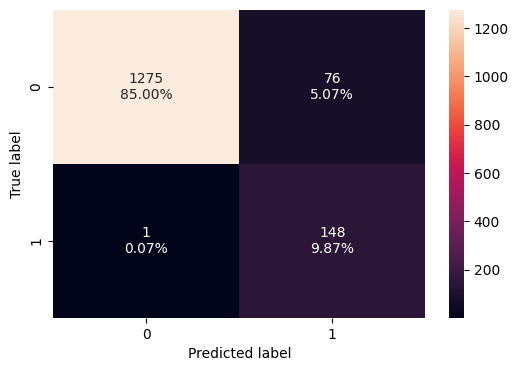

In [93]:
confusion_matrix_sklearn(model3, X_test, y_test)

In [94]:
decision_tree_postprune_test = model_performance_classification_sklearn(
    model3, X_test, y_test
)
decision_tree_postprune_test

,Accuracy,Recall,Precision,F1
0,0.948667,0.993289,0.660714,0.793566


##### Visualizing the decision tree

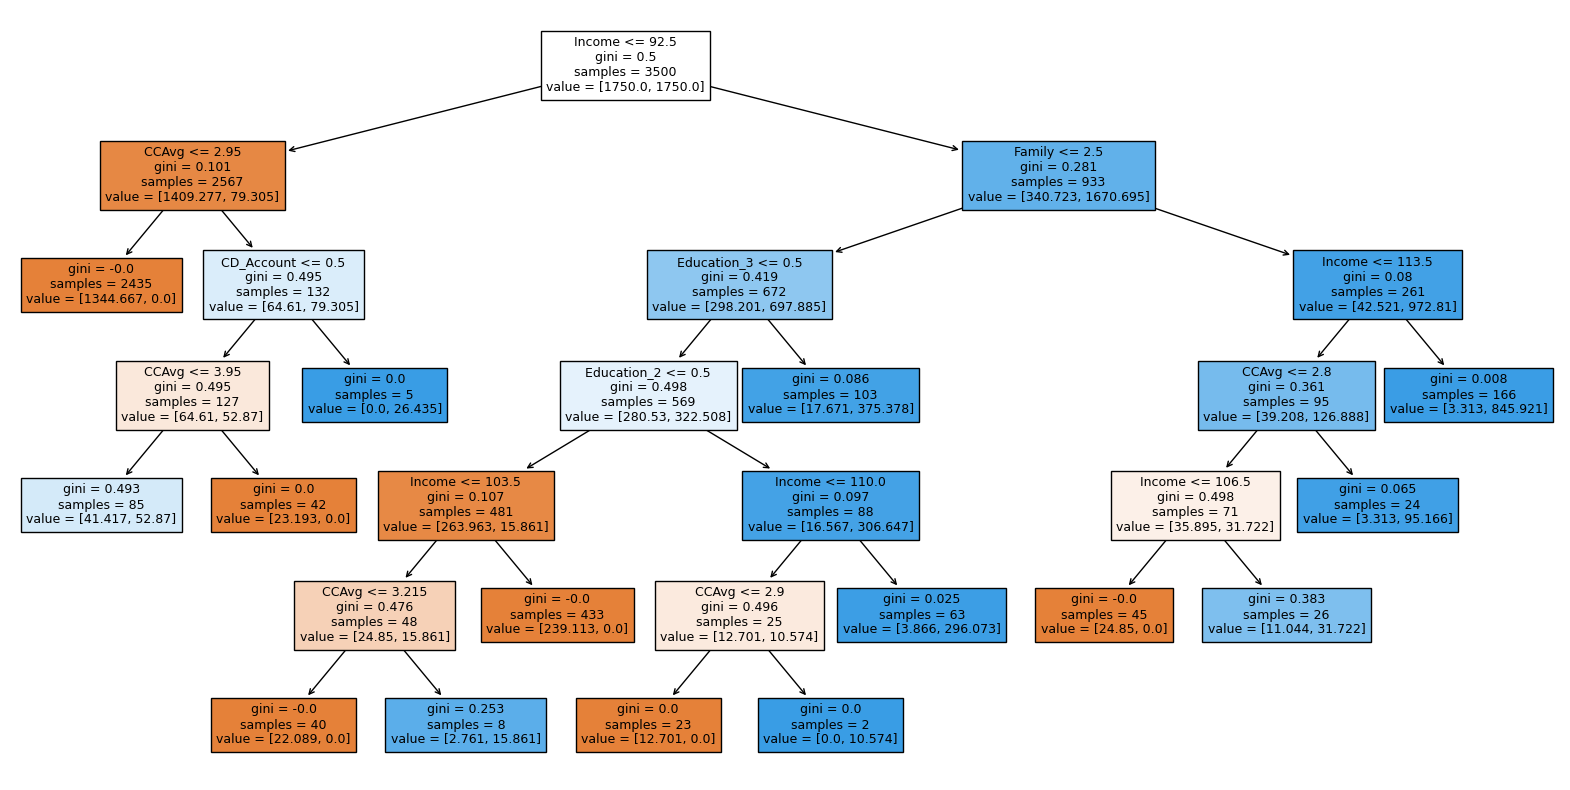

In [95]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [96]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model3, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |   |--- Income >  103.50
|   |   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 110.00
|   |   |   |   |   |--- CCAvg <= 2.90
|   |   |   |   |   |   |--- weights: [12

##### Feature Importance

In [97]:
print(
    pd.DataFrame(
        model3.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.668840
Education_2         0.146614
CCAvg               0.083952
Education_3         0.051622
Family              0.040954
CD_Account          0.008018
Age                 0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


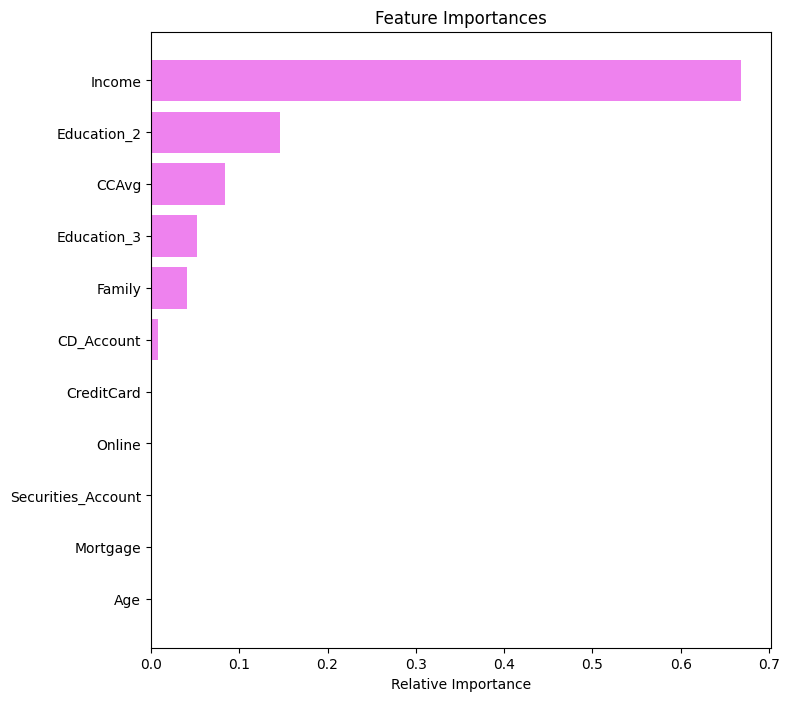

In [98]:
importances = model3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The post pruned model performs comparably in both train and
test datasets and isn't overfitting with an overly simple tree which could potentially fail on unseen data.
* It has high Recall but also reasonble Precision and F1.
* The most important features in this model are Income, Education levels 2 and 3, Average Credit Card Spend, Family and CD account.



## Model Comparison and Final Model Selection

In [99]:
# Comparison of training models

models_train_comp_df = pd.concat(
    [
        decision_tree_default_train.T, #Default model
        decision_tree_perf_train.T, #Class weights model
        decision_tree_preprune_train.T, #Pre-pruned model
        decision_tree_postprune_train.T, #Post-pruned model
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.790286,0.956857
Recall,1.0,1.0,1.000000,1.000000
Precision,1.0,1.0,0.310798,0.686722
F1,1.0,1.0,0.474212,0.814268


In [100]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_test.T,
        decision_tree_perf_test.T,
        decision_tree_preprune_test.T,
        decision_tree_postprune_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.987333,0.978667,0.779333,0.948667
Recall,0.906040,0.852349,1.000000,0.993289
Precision,0.964286,0.927007,0.310417,0.660714
F1,0.934256,0.888112,0.473768,0.793566


* Decision trees in default model settings are overfitting and very complex, and does not show similar performance between train and test data.
* Removing the Experience variable and using class_weight variable does not fix the overfitting, with perfect scores in train and high scores in test too, which indicates that the model is unlikely to perform well on new unseen data.
* The pre-pruned decision tree has a perfect Recall in both train and test data, but very low Precision and F1. It is not a good enough trade off, since false positives also have an impact on the business and the number of false positives are very high. We are looking for a balanced well performing model while optimizing Recall, not to maximize Recall at the cost of other parameters. Moreover the pre-pruned tree is very large and complex, which also indicates that it is close to overfitting false negatives despite the hyperparameters.
* The post-pruned decision tree performs comparably for both train and test data, with a perfect Recall for train and a near perfect Recall for test, while not letting Precision and F1 full unreasonbly low. Looking at the tree as well, we can see that there is a reasonable size and a reasonable amount of features used, which shows a good trade off between complexitiy and model peformance.
After post pruning we observe an Accuracy of 0.95, Recall of 1.0, Precision of 0.68 and F1 score of 0.81 for training data, whereas for test data the performance metrics are 0.948, 0.99, 0.66 and 0.79 respectively.
* Therefore, we are choosing the post-pruned tree as our best model.

## Actionable Insights and Business Recommendations


* In order to provide an accurate prediction of the customers that will accept the loan, the bank can use the post-pruned decision tree since it gave the highest recall and best model overall with 1.00 Recall in training data and 0.99 Recall in the test data.
* From the correlation analysis and the decision tree we have deduced that the customer's income, education level, average credit card spend, family size and whether or not they have a CD Account are the factors that most influence whether or not they will opt for the loan.

* Income of a customer is one of the strongest predictor variables, generally higher income (above 120k USD) customers are much more likely optfor the Personal Loan. The bank can target their efforts to their higher income customers.
* Education level is also a strong indicator; graduates and advanced/professionals are more likely to opt for the loan. It is worthwhile targeting customers in those education levels.
* Customers with a higher average credit card spending (above 2k USD) are more likely to opt for the Personal Loan, which can be a key focus area for the bank, mindful of the fact that customers with higher credit card spending are also at higher risk of not paying back a loan in the future.
* Family Size also plays a role in predicting whether or not a customer accepts the personal loan; generally those with family size of more than 2 accept. We recommend that the bank finds out accurately the family size of their customers, since it is possible to change over time, and target those with a larger family.
* CD Account holders are also much more likely to accept a personal loan. There can be a targeted effort to market to those customers.

* The bank must also keep updating and retraining the data to make sure it can accurately predict the likelihood of loan acceptance with changing income (inflation rates), changing family sizes, education level, etc as these factors change with time and as more generations enter the income-generating population. This model has to be retrained and maintained to be useful and stand the rest of time and social factors that are out of scope.

___